In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploratory data analysis 
This is the test task to apply for the participation in Product Analytics Camp at United Tech.

Performed by Danylo Vaschchevskyi.

## Problem
You're a marketing analyst and you've been told by the Senior Marketing Manager that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set in order to understand this problem and propose data-driven solutions. You are required to solve the following questions to generate a report for your management.

## Task
Provide Exploratory Data Analysis (EDA Analysis) for the data set

## 1. First look on the dataset.

Let's have our first look on the dataset. Here we import all necessary Python packages and load data from the file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
import sklearn
import math
import seaborn as sns
Data=pd.read_csv('Data/ifood_df.csv')
Data = Data[sorted(Data.columns)]
pd.set_option("display.max_rows", None, "display.max_columns", None)
Data.head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   AcceptedCmpOverall  Age  Complain  Customer_Days   Income  Kidhome  \
0                   0   63         0           2822  58138.0        0   
1                   0   66         0           2272  46344.0        1   
2                   0   55         0           2471  71613.0        0   
3                   0   36         0           2298  26646.0        1   
4                   0   39         0           2320  58293.0        1   

   MntFishProducts  MntFruits  MntGoldProds  MntMeatProducts  MntRegularProds  \
0              172         88            88              546             1441   
1                2          1             6                6               15   
2              111         49            42              127              692   
3               10          4             5               20               43   
4               46         43            15              118              392   

   MntSweetProducts  MntTotal  MntWines  NumCatalogPurchases  \
0                88      1529       635                   10   
1                 1        21        11                    1   
2                21       734       426                    2   
3                 3        48        11                    0   
4                27       407       173                    3   

   NumDealsPurchases  NumStorePurchases  NumWebPurchases  NumWebVisitsMonth  \
0                  3                  4                8                  7   
1                  2                  2                1                  5   
2                  1                 10                8                  4   
3                  2                  4                2                  6   
4                  5                  6                5                  5   

   Recency  Response  Teenhome  Z_CostContact  Z_Revenue  education_2n Cycle  \
0       58         1         0              3         11                   0   
1       38         0         1              3         11                   0   
2       26         0         0              3         11                   0   
3       26         0         0              3         11                   0   
4       94         0         0              3         11                   0   

   education_Basic  education_Graduation  education_Master  education_PhD  \
0                0                     1                 0              0   
1                0                     1                 0              0   
2                0                     1                 0              0   
3                0                     1                 0              0   
4                0                     0                 0              1   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   marital_Widow  
0              0  
1              0  
2              0  
3              0  
4              0

After we loaded the data and inspected first 5 rows, we need to understand what features are represented. Luckily, we are provided with dictionary for the features (It was outdated and all features were not fully described). Here it is.

1. **AcceptedCmp1** - 1 if customer accepted the offer in the $1^{st}$ campaign, 0 otherwise.
2. **AcceptedCmp2** - 1 if customer accepted the offer in the $2^{nd}$ campaign, 0 otherwise.
3. **AcceptedCmp3** - 1 if customer accepted the offer in the $3^{rd}$ campaign, 0 otherwise.
4. **AcceptedCmp4** - 1 if customer accepted the offer in the $4^{th}$ campaign, 0 otherwise.
5. **AcceptedCmp5** - 1 if customer accepted the offer in the $5^{th}$ campaign, 0 otherwise.
6. **Response** (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise.
7. **AcceptedCmpOverall** - number of campaigns, accepted by customer.
8. **Age** - age of customer.
9. **Customer_Days** - amount of days since customers registration.
10. **Complain** - 1 if customer complained in the last 2 years.
11. **Education** - customer's level of education.
12. **Marital** - customer's marital status.
13. **Kidhome** - number of small children in customer's household.
14. **Teenhome** - number of teenagers in customer's household.
15. **Income** - customer's yearly household income.
16. **MntFishProducts** - amount spent on fish products in the last 2 years.
17. **MntMeatProducts** - amount spent on meat products in the last 2 years.
18. **MntFruits** - amount spent on fruits in the last 2 years.
19. **MntSweetProducts** - amount spent on sweet products in the last 2 years.
20. **MntWines** - amount spent on wines in the last 2 years.
21. **MntGoldProds** - amount spent on *gold* products in the last 2 years.
22. **MntTotal** - amount spent on products (not gold).
22. **NumDealsPurchases** - number of purchases made with discount.
23. **NumCatalogPurchases** - number of purchases made using catalogue.
24. **NumStorePurchases** - number of purchases made directly in stores.
25. **NumWebPurchases** - number of purchases made through company's web site.
26. **NumWebVisitsMonth** - number of visits to company's web site in the last month.
27. **Recency** - number of days since the last purchase.

Now, let's see info about variables in our dataset. We will inspect it for missing values and divide variables into numerical and categorical.

In [3]:

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcceptedCmp1          2205 non-null   int64  
 1   AcceptedCmp2          2205 non-null   int64  
 2   AcceptedCmp3          2205 non-null   int64  
 3   AcceptedCmp4          2205 non-null   int64  
 4   AcceptedCmp5          2205 non-null   int64  
 5   AcceptedCmpOverall    2205 non-null   int64  
 6   Age                   2205 non-null   int64  
 7   Complain              2205 non-null   int64  
 8   Customer_Days         2205 non-null   int64  
 9   Income                2205 non-null   float64
 10  Kidhome               2205 non-null   int64  
 11  MntFishProducts       2205 non-null   int64  
 12  MntFruits             2205 non-null   int64  
 13  MntGoldProds          2205 non-null   int64  
 14  MntMeatProducts       2205 non-null   int64  
 15  MntRegularProds      

Dataset has no missing values. We see that amount of the columns is bigger than the amount of the features, this means that multiple variables can describe one feature, for example Marital is catigorical feature that is described with 5 variables: marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow.

**Numerical features**: Age, Kidhome, Teenhome, Income, MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds,MntTotal NumDealsPurchases, NumCatalogPurchases, NumStorePurchases, NumWebPurchases, NumWebVisitsMonth, Recency.

**Categorical features**: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, Education, Marital,Complain.

In [4]:
Data.nunique()

AcceptedCmp1               2
AcceptedCmp2               2
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmpOverall         5
Age                       56
Complain                   2
Customer_Days            662
Income                  1963
Kidhome                    3
MntFishProducts          182
MntFruits                158
MntGoldProds             212
MntMeatProducts          551
MntRegularProds          974
MntSweetProducts         176
MntTotal                 897
MntWines                 775
NumCatalogPurchases       13
NumDealsPurchases         15
NumStorePurchases         14
NumWebPurchases           15
NumWebVisitsMonth         16
Recency                  100
Response                   2
Teenhome                   3
Z_CostContact              1
Z_Revenue                  1
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Master           2
education_PhD              2
marital_Divorc

## 2. Data cleaning
Now, let's try to find outliers in the numerical data, to do so the box plot is the most effective way. Outliers can make resulting model not as representative as it could be when the dataset is cleaned.

Here is lists of features that will be analyzed later in this notebook. 

364
562
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcceptedCmp1          2205 non-null   int64  
 1   AcceptedCmp2          2205 non-null   int64  
 2   AcceptedCmp3          2205 non-null   int64  
 3   AcceptedCmp4          2205 non-null   int64  
 4   AcceptedCmp5          2205 non-null   int64  
 5   AcceptedCmpOverall    2205 non-null   int64  
 6   Age                   2205 non-null   int64  
 7   Complain              2205 non-null   int64  
 8   Customer_Days         2205 non-null   int64  
 9   Income                2205 non-null   float64
 10  Kidhome               2205 non-null   int64  
 11  MntFishProducts       2205 non-null   int64  
 12  MntFruits             2205 non-null   int64  
 13  MntGoldProds          2205 non-null   int64  
 14  MntMeatProducts       2205 non-null   int64  
 15  MntRegularPro

Age                       AxesSubplot(0.125,0.749828;0.168478x0.130172)
Customer_Days          AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Kidhome                AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Teenhome               AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Income                    AxesSubplot(0.125,0.593621;0.168478x0.130172)
MntFishProducts        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MntMeatProducts        AxesSubplot(0.529348,0.593621;0.168478x0.130172)
MntFruits              AxesSubplot(0.731522,0.593621;0.168478x0.130172)
MntSweetProducts          AxesSubplot(0.125,0.437414;0.168478x0.130172)
MntWines               AxesSubplot(0.327174,0.437414;0.168478x0.130172)
MntGoldProds           AxesSubplot(0.529348,0.437414;0.168478x0.130172)
MntTotal               AxesSubplot(0.731522,0.437414;0.168478x0.130172)
NumDealsPurchases         AxesSubplot(0.125,0.281207;0.168478x0.130172)
NumCatalogPurchases    AxesSubplot(0.327174,0.281207;0.168478x0.

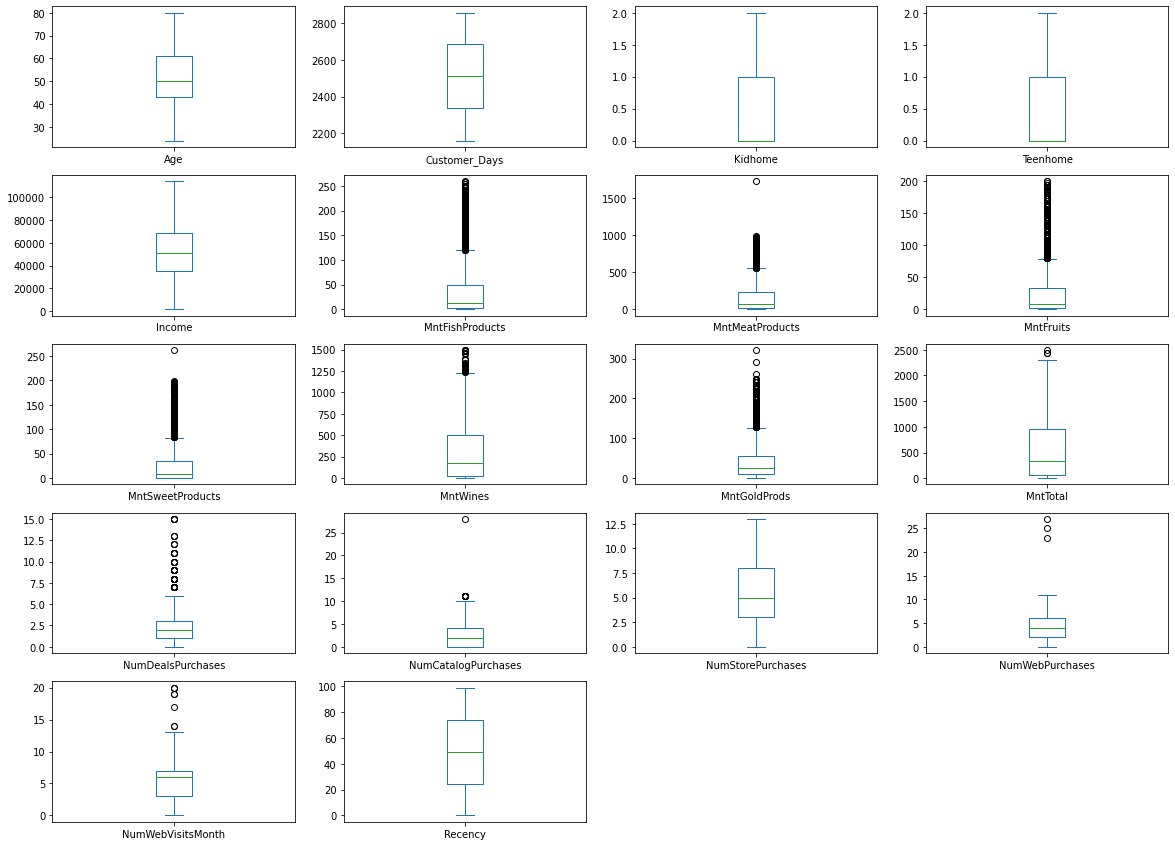

In [5]:
numeric_columns = ["Age","Customer_Days","Kidhome", "Teenhome", "Income", "MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds", "MntTotal", "NumDealsPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases", "NumWebVisitsMonth", "Recency"]
educations = ["education_Basic","education_Graduation","education_Master","education_PhD"]
Mnt = ["MntFishProducts", "MntFruits", "MntGoldProds", "MntMeatProducts", "MntRegularProds", "MntSweetProducts", "MntWines", "MntTotal"]
# Without MntRegularProds, MntTotal.
Mnt_prods = ["MntFishProducts", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines", "MntGoldProds"]

Num = ["NumCatalogPurchases","NumDealsPurchases","NumStorePurchases","NumWebPurchases","NumWebVisitsMonth"]

Cmp = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response","AcceptedCmpOverall"]
print(Data["education_Master"].sum())

for i, row in Data.iterrows():
    Data.at[i,"Totalkids"] = row["Kidhome"]+row["Teenhome"]
    if row["education_2n Cycle"] == 1:
        Data.at[i,"education_Master"] = 1
        
print(Data["education_Master"].sum())

Data = Data.drop(columns = ["education_2n Cycle"])

Data.info()
marital = ["marital_Single","marital_Together","marital_Married","marital_Divorced","marital_Widow"]
Data[numeric_columns].plot(layout =(5,4),kind = "box", subplots = True, figsize = (20,15))

In *MntMeatProducts*, *NumWebPurchases* and *NumCatalogPurchases* we clearly see the outliers. I'd prefer to remove them to make mean more accurate for the rest of the samples.

MntMeatProducts           AxesSubplot(0.125,0.125;0.227941x0.755)
NumCatalogPurchases    AxesSubplot(0.398529,0.125;0.227941x0.755)
NumWebPurchases        AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

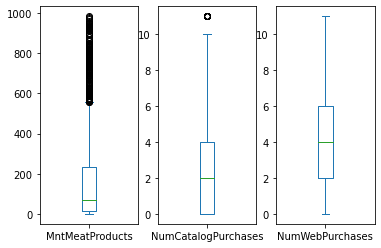

In [6]:
Data_cleaned = Data.drop(Data[Data["MntMeatProducts"]>1500].index).reset_index(drop=True)
Data_cleaned = Data_cleaned.drop(Data_cleaned[Data_cleaned["NumCatalogPurchases"]>25].index).reset_index(drop=True)
Data_cleaned = Data_cleaned.drop(Data_cleaned[Data_cleaned["NumWebPurchases"]>20].index).reset_index(drop=True)
Data_cleaned = Data_cleaned.drop(columns = ["Z_CostContact","Z_Revenue"])
Data_cleaned[["MntMeatProducts","NumCatalogPurchases","NumWebPurchases"]].plot(layout = (1,3), kind = "box", subplots = True)


Here we can see characteristics of this dataset and in **mean** column we can consider as portrait of median customer.

In [7]:
Data_cleaned.describe().T

count          mean           std     min      25%  \
AcceptedCmp1          2201.0      0.064516      0.245726     0.0      0.0   
AcceptedCmp2          2201.0      0.013630      0.115976     0.0      0.0   
AcceptedCmp3          2201.0      0.074057      0.261924     0.0      0.0   
AcceptedCmp4          2201.0      0.074512      0.262661     0.0      0.0   
AcceptedCmp5          2201.0      0.073149      0.260439     0.0      0.0   
AcceptedCmpOverall    2201.0      0.299864      0.680939     0.0      0.0   
Age                   2201.0     51.088142     11.703203    24.0     43.0   
Complain              2201.0      0.009087      0.094912     0.0      0.0   
Customer_Days         2201.0   2512.887778    202.559492  2159.0   2339.0   
Income                2201.0  51657.867333  20616.629144  1730.0  35246.0   
Kidhome               2201.0      0.442526      0.537240     0.0      0.0   
MntFishProducts       2201.0     37.820990     54.853480     0.0      3.0   
MntFruits             2201.0     26.446161     39.807799     0.0      2.0   
MntGoldProds          2201.0     43.857338     51.159284     0.0      9.0   
MntMeatProducts       2201.0    164.806906    215.359506     0.0     16.0   
MntRegularProds       2201.0    518.945934    553.268987  -151.0     42.0   
MntSweetProducts      2201.0     27.055429     40.851812     0.0      1.0   
MntTotal              2201.0    562.803271    575.706530     4.0     56.0   
MntWines              2201.0    306.673785    337.586029     0.0     24.0   
NumCatalogPurchases   2201.0      2.636983      2.747143     0.0      0.0   
NumDealsPurchases     2201.0      2.315766      1.866395     0.0      1.0   
NumStorePurchases     2201.0      5.833712      3.235958     0.0      3.0   
NumWebPurchases       2201.0      4.074057      2.626692     0.0      2.0   
NumWebVisitsMonth     2201.0      5.345298      2.407712     0.0      3.0   
Recency               2201.0     49.033167     28.912050     0.0     24.0   
Response              2201.0      0.151295      0.358417     0.0      0.0   
Teenhome              2201.0      0.506134      0.543627     0.0      0.0   
education_Basic       2201.0      0.024534      0.154736     0.0      0.0   
education_Graduation  2201.0      0.504771      0.500091     0.0      0.0   
education_Master      2201.0      0.255338      0.436150     0.0      0.0   
education_PhD         2201.0      0.215357      0.411163     0.0      0.0   
marital_Divorced      2201.0      0.104498      0.305975     0.0      0.0   
marital_Married       2201.0      0.387097      0.487197     0.0      0.0   
marital_Single        2201.0      0.215811      0.411477     0.0      0.0   
marital_Together      2201.0      0.258065      0.437669     0.0      0.0   
marital_Widow         2201.0      0.034530      0.182627     0.0      0.0   
Totalkids             2201.0      0.948660      0.749302     0.0      0.0   

                          50%      75%       max  
AcceptedCmp1              0.0      0.0       1.0  
AcceptedCmp2              0.0      0.0       1.0  
AcceptedCmp3              0.0      0.0       1.0  
AcceptedCmp4              0.0      0.0       1.0  
AcceptedCmp5              0.0      0.0       1.0  
AcceptedCmpOverall        0.0      0.0       4.0  
Age                      50.0     61.0      80.0  
Complain                  0.0      0.0       1.0  
Customer_Days          2515.0   2688.0    2858.0  
Income                51315.0  68281.0  105471.0  
Kidhome                   0.0      1.0       2.0  
MntFishProducts          12.0     50.0     259.0  
MntFruits                 8.0     33.0     199.0  
MntGoldProds             25.0     56.0     262.0  
MntMeatProducts          68.0    232.0     984.0  
MntRegularProds         288.0    884.0    2458.0  
MntSweetProducts          8.0     34.0     198.0  
MntTotal                343.0    964.0    2491.0  
MntWines                179.0    507.0    1493.0  
NumCatalogPurchases       2.0      4.0      11.0  
NumDealsPurchases        

## 3. Looking for insights

Good way to understand how data is related, is to build a correlation matrix. The closer value to 1 or -1, the more data is related. 1 or -1 means linear dependency. 0 means that data could be independent.

<AxesSubplot:>

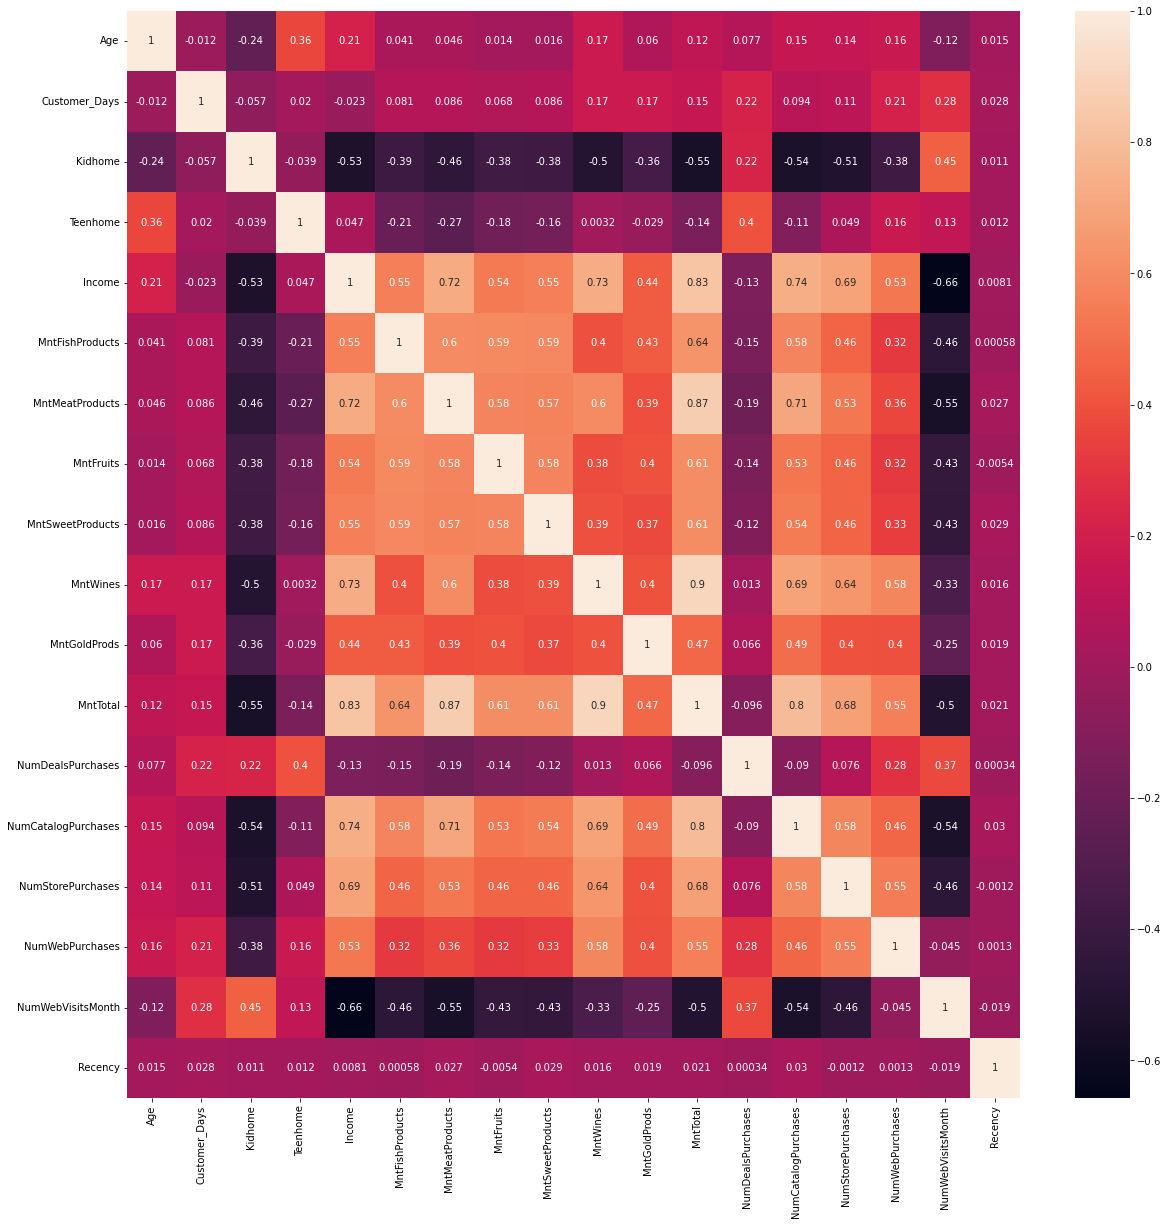

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(Data_cleaned[numeric_columns].corr(), annot=True)

Customer's buying ability is determined by income and lifestyle. We well consider this features as key features to perform clusterization.

Important correlations:

   **postitve**:  (Income, MntWines), (MntWines,MntTotal), (MntMeatProducts, MntTotal).
   
   **negative**: (Income,Kidhome), (Income, NumWebVisitsMonth).

### Income distribution

C:\Users\rxwot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


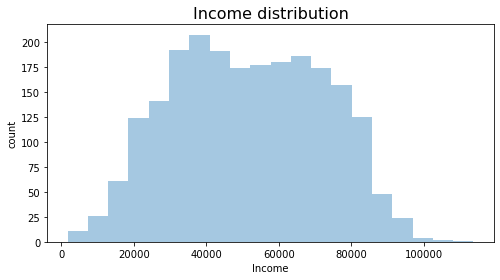

In [9]:
plt.figure(figsize=(8,4))
sns.distplot(Data['Income'], kde=False, hist=True, bins = 20)
plt.title('Income distribution', size=16)
plt.ylabel('count');

Looks like *Normal* distributions. This hypothesis might be tested later.

### Kids and teens at household.

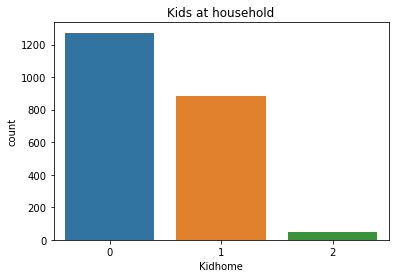

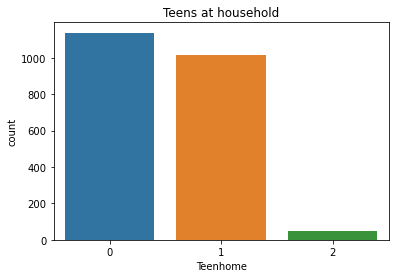

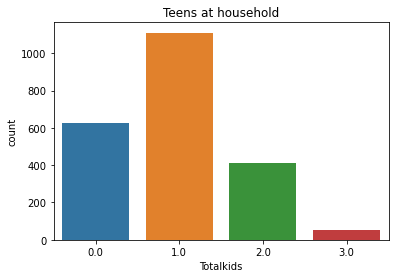

In [10]:

sns.countplot(data = Data_cleaned, x = "Kidhome")
plt.title('Kids at household')
plt.ylabel('count');
plt.show()
sns.countplot(data = Data_cleaned, x = "Teenhome")
plt.title('Teens at household')
plt.ylabel('count');
plt.show()
sns.countplot(data = Data_cleaned, x = "Totalkids")
plt.title('Teens at household')
plt.ylabel('count');



For this dataset it is optimal to engineer *Kidhome* and *Teenhome* into *Totalkids* feature.

**Insight**: One quarter of our customers have no children.

**Insight**: Half of our customers have one child.

### Education

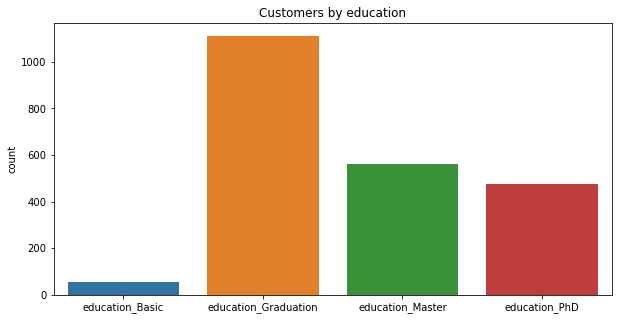

In [11]:

Ed = Data_cleaned[educations].sum(axis = 0)


plt.figure(figsize=(10,5))
sns.barplot(x = Ed.index, y = Ed.values)
plt.title('Customers by education')
plt.ylabel('count');

**Insight**: Almost all our customers have a higher educaton.

**Insight**: Half of our customers are graduated.

### Marital

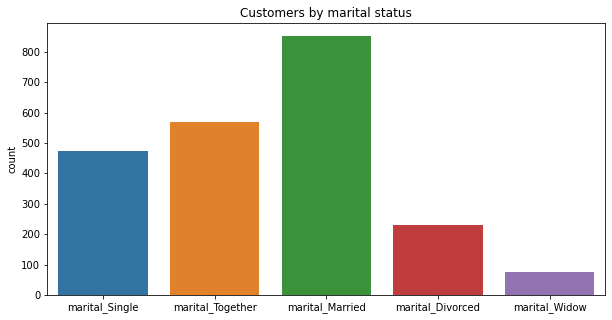

In [12]:
Mar = Data_cleaned[marital].sum(axis = 0)

plt.figure(figsize=(10,5))
sns.barplot(x = Mar.index, y =  Mar.values)
plt.title('Customers by marital status')
plt.ylabel('count');

**Insight**: Majority of our customers are living with someone.

### Age

Age distribution with 0.25, 0.5 and 0.75 quantiles. Age can serve as powerful clusterization factor.

C:\Users\rxwot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


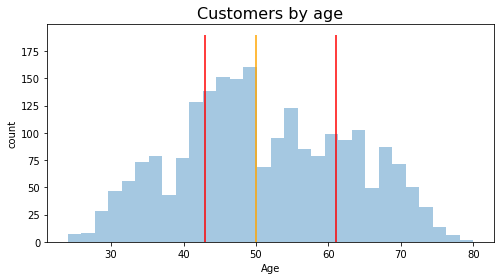

In [13]:
plt.figure(figsize=(8,4))
sns.distplot(Data_cleaned['Age'], kde=False, hist=True, bins = 30)
plt.vlines(x = Data_cleaned.Age.quantile(q=0.5),ymin = 0,ymax = 190,color = 'orange')
plt.vlines(x = Data_cleaned.Age.quantile(q=0.25),ymin = 0,ymax = 190,color = 'red')
plt.vlines(x = Data_cleaned.Age.quantile(q=0.75),ymin = 0,ymax = 190,color = 'red')


plt.title('Customers by age', size=16)
plt.ylabel('count');

### Trying to find dependencies

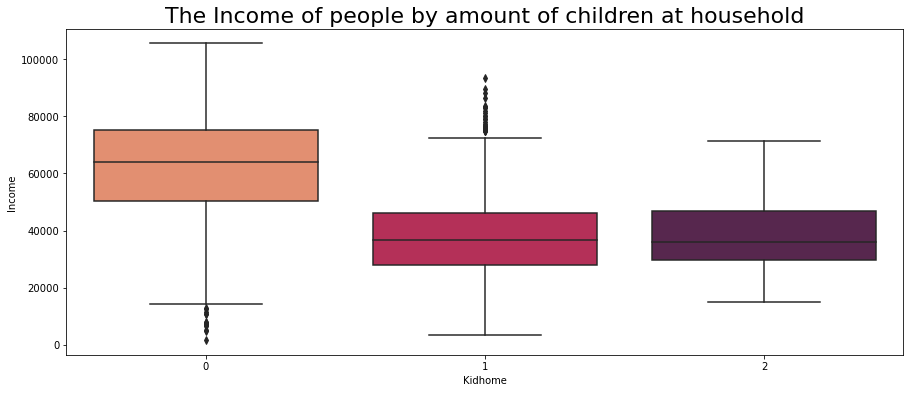

In [14]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Kidhome',y = 'Income',
            palette = 'rocket_r', data = Data_cleaned)
plt.title('The Income of people by amount of children at household',fontsize = 22)
plt.show()

**Insight**: Customers with no children tend to have larger household income.

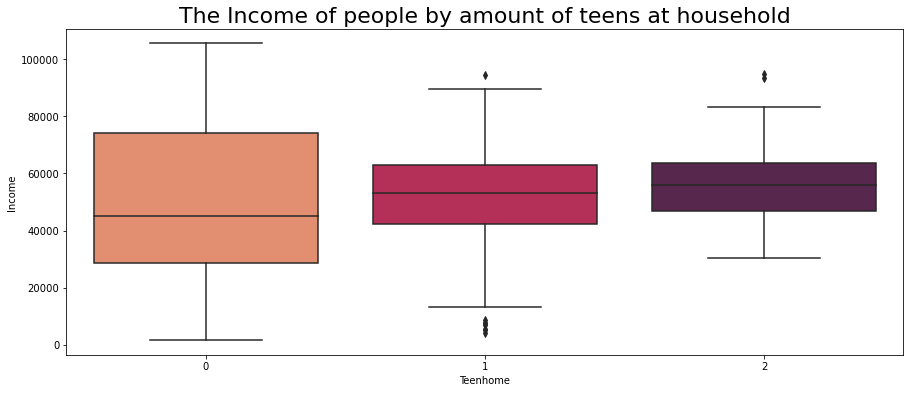

In [15]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Teenhome',y = 'Income',
            palette = 'rocket_r', data = Data_cleaned)
plt.title('The Income of people by amount of teens at household',fontsize = 22)
plt.show()

No major difference in income

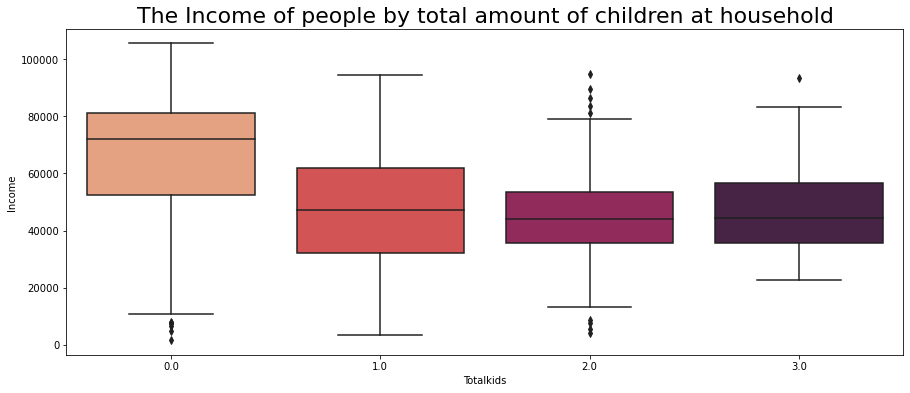

In [16]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Totalkids',y = 'Income',
            palette = 'rocket_r', data = Data_cleaned)
plt.title('The Income of people by total amount of children at household',fontsize = 22)
plt.show()

**Insight**: Customers with children usually have lesser household income.


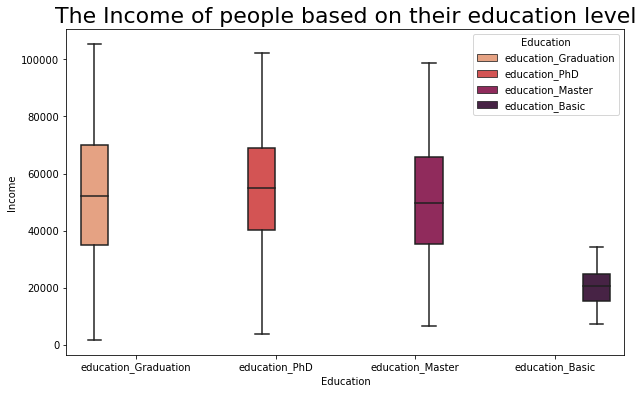

In [17]:
for i, row in Data_cleaned.iterrows():
    for x in row.index:
        if x in educations and row[x]==1:
            Data_cleaned.at[i,"Education"] = x
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Education',y = 'Income',
            hue = 'Education',palette = 'rocket_r', data = Data_cleaned)
plt.title('The Income of people based on their education level',fontsize = 22)
plt.show()

**Insight**: Customers with degree have no significant difference in income. Customers with basic education have lower income.

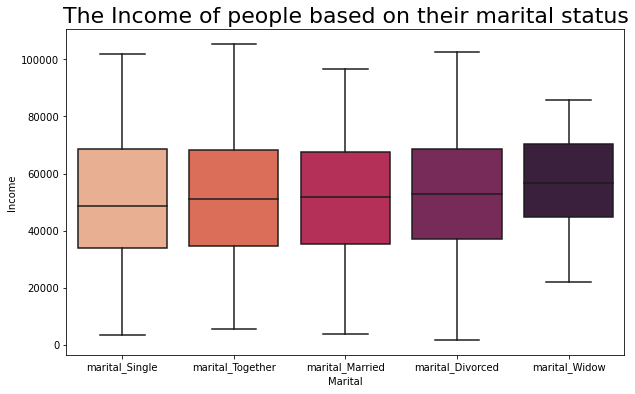

In [18]:
for i, row in Data_cleaned.iterrows():
    for x in row.index:
        if x in marital and row[x]==1:
            Data_cleaned.at[i,"Marital"] = x
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Marital',y = 'Income',
            palette = 'rocket_r', data = Data_cleaned)
plt.title('The Income of people based on their marital status',fontsize = 22)
plt.show()


**Insight**: Seems that Marital status  does not affect household income.

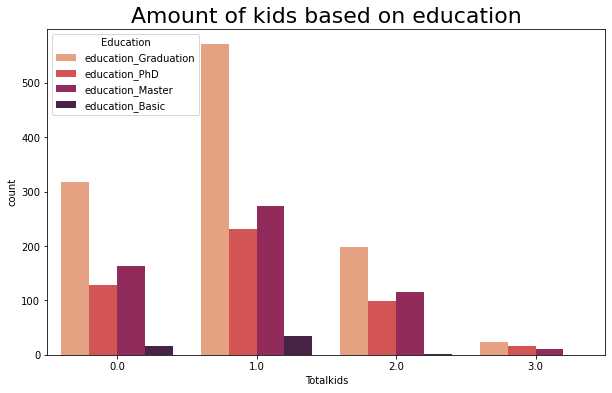

In [19]:
for i, row in Data_cleaned.iterrows():
    for x in row.index:
        if x in educations and row[x]==1:
            Data_cleaned.at[i,"Education"] = x
plt.figure(figsize = (10,6))
sns.countplot(x = 'Totalkids',
            hue = 'Education',palette = 'rocket_r', data = Data_cleaned)
plt.title('Amount of kids based on education',fontsize = 22)
plt.show()

Distribution looks proportional to count.

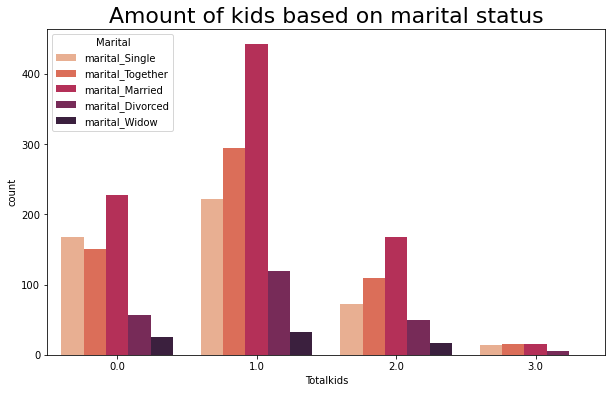

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Totalkids',
            hue = 'Marital',palette = 'rocket_r', data = Data_cleaned)
plt.title('Amount of kids based on marital status',fontsize = 22)
plt.show()

Distribution looks proportional to count.

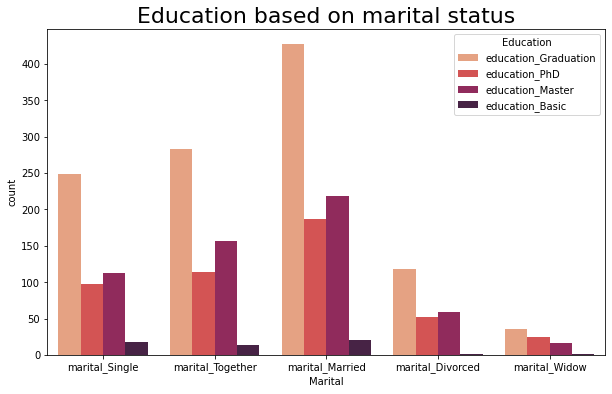

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Marital',
            hue = 'Education',palette = 'rocket_r', data = Data_cleaned)
plt.title('Education based on marital status',fontsize = 22)
plt.show()

Distribution looks proportional to count.

Text(0, 0.5, 'Income')

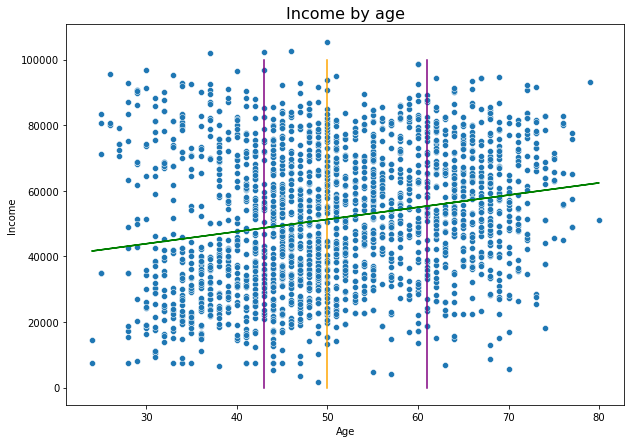

In [22]:
plt.figure(figsize=(10,7))
Q1 = Data_cleaned.Age.quantile(q=0.25)
Q2 = Data_cleaned.Age.quantile(q=0.75)
M = Data_cleaned.Age.quantile(q=0.5)


plt.plot([Q1, Q1], [0, 100000], color = "purple")
plt.plot([Q2, Q2], [0, 100000], color = "purple")
plt.plot([M, M], [0, 100000], color = "orange")






sns.scatterplot(data = Data_cleaned, x = "Age", y = "Income")
plt.title('Income by age', size=16)

a, b = np.polyfit(Data_cleaned["Age"], Data_cleaned["Income"], 1)

#add points to plot

#add line of best fit to plot
plt.plot(Data_cleaned["Age"], a*Data_cleaned["Age"]+b, color = "green")        
plt.ylabel('Income')






Age - Income scatterplot with median and 0.25, 0.75 quantiles. Green line is the line of trend. 

**Insight**: Income seems to increase with age

Text(0.5, 1.0, 'Total kids by age')

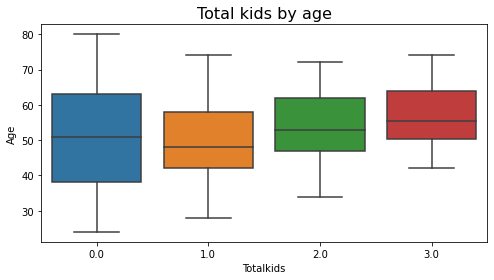

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data = Data_cleaned, y = "Age", x = "Totalkids")
plt.title('Total kids by age', size=16)

**Insight**: Amount of kids seems to increase with age

Text(0.5, 1.0, 'Education by age')

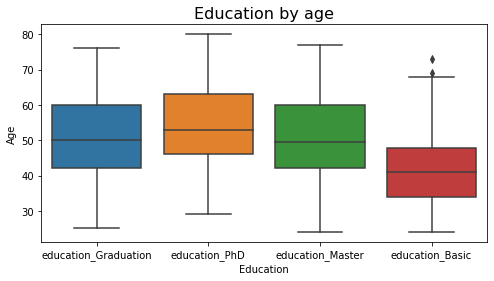

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(data = Data_cleaned, y = "Age", x = "Education")
plt.title('Education by age', size=16)

**Insight***: PhDs usually little bit older than graduates and masters.

Text(0.5, 1.0, 'Marital status by age')

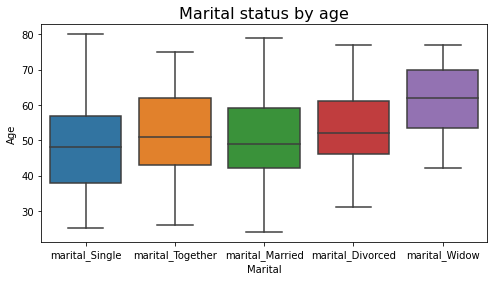

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(data = Data_cleaned, y = "Age", x = "Marital")
plt.title('Marital status by age', size=16)

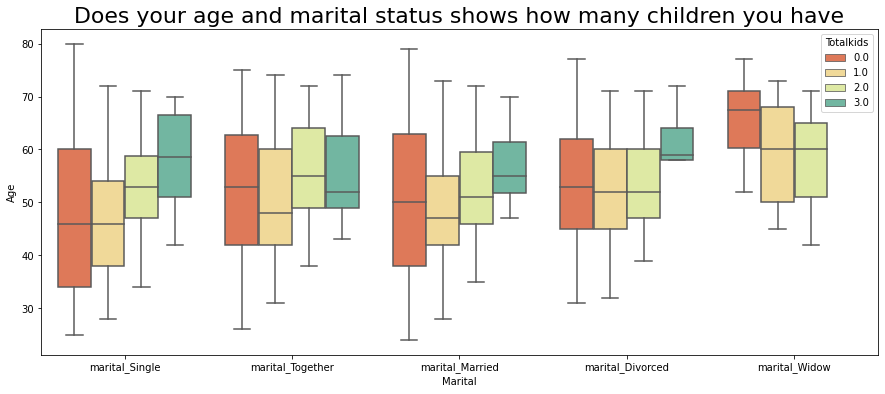

In [26]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Marital',y = 'Age',hue = 'Totalkids' ,data = Data_cleaned, palette = 'Spectral')
plt.title("Does your age and marital status shows how many children you have",fontsize = 22)
plt.show()

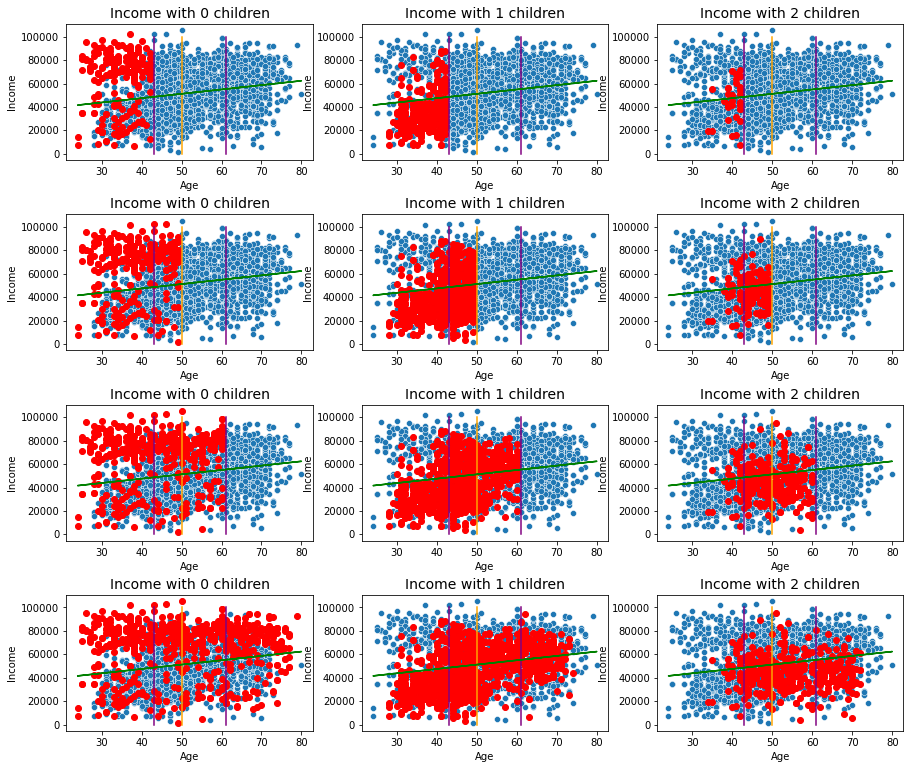

In [27]:
plt.figure(figsize = (15,13))
plt.subplots_adjust(hspace=0.4)
Q1 = Data_cleaned.Age.quantile(q=0.25)
Q2 = Data_cleaned.Age.quantile(q=0.75)
M = Data_cleaned.Age.quantile(q=0.5)
END = Data_cleaned.Age.quantile(q=1)

Q = [Q1,M,Q2, END]

def group_plot(dat,ax):
    
    plt.plot([Q1, Q1], [0, 100000], color = "purple")
    plt.plot([Q2, Q2], [0, 100000], color = "purple")
    plt.plot([M, M], [0, 100000], color = "orange")
    a, b = np.polyfit(Data_cleaned["Age"], Data_cleaned["Income"], 1)
    sns.scatterplot(data = Data_cleaned, x = "Age", y = "Income")
    

    plt.plot(Data_cleaned["Age"], a*Data_cleaned["Age"]+b, color = "green")        
    plt.ylabel('Income')
    plt.scatter(data = dat, x = "Age", y = "Income",color = "red")
    plt.ax = ax
    
    
nrows = 4
ncols = 3
cnt = 0
for i in range(len(Q)):

    for j in range(3):
        Group_check = Data_cleaned
        Group_check = Data_cleaned[Data_cleaned["Age"]<Q[i]]
        Group_check = Group_check[Group_check["Totalkids"] == j]
        ax = plt.subplot(nrows, ncols, cnt + 1)
        plt.title('Income with ' +str(j)+ ' children', size=14)
        group_plot(Group_check, ax)
        cnt = cnt+1
    



Based on this plots, we will split customers into 4 groups.

*Group0*: Young age and has kids, low income.

*Group1*: Young age and no kids, high income.

*Group2*: No kids, high income.

*Group3*: Has hids, middle income


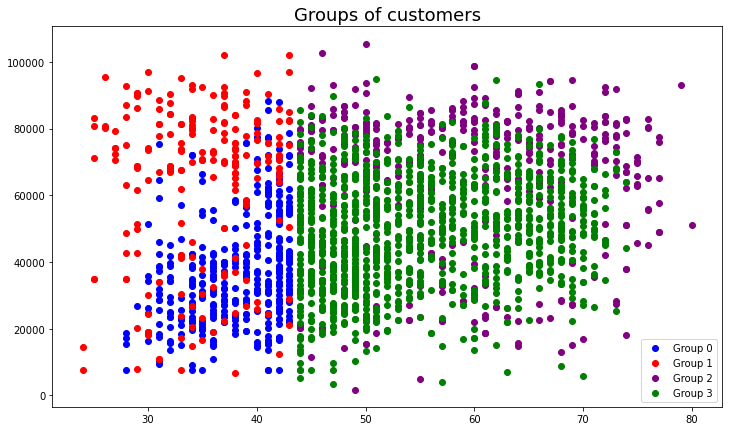

In [28]:

Group = [0,0,0,0,0]
Group[0] = Data_cleaned
Group[0] = Group[0][Group[0]["Age"]<=Q1]
Group[0] = Group[0][Group[0]["Totalkids"] > 0]

Group[1] = Data_cleaned
Group[1] = Group[1][Group[1]["Age"]<=Q1]
Group[1] = Group[1][Group[1]["Totalkids"] == 0]


Group[2] = Data_cleaned
Group[2] = Group[2][Group[2]["Age"]>Q1]
Group[2] = Group[2][Group[2]["Totalkids"] == 0]

Group[3] = Data_cleaned
Group[3] = Group[3][Group[3]["Age"]>Q1]
Group[3] = Group[3][Group[3]["Totalkids"] > 0]

n = 4

col = ["b", "r", "purple", "green", "yellow"]
plt.figure(figsize = (12,7))
for i in range(n):
    
    plt.scatter(data = Group[i], x = "Age", y = "Income", color = col[i])
   

    plt.legend(labels = ["Group 0", "Group 1", "Group 2" ,"Group 3"])
plt.title("Groups of customers", fontsize = 18)
plt.show()


Third group is the largest and buys the most products.

In [29]:
for i in range(n):
    print("Sets in Group"+str(i)+": "+str(Group[i].shape[0]))


Sets in Group0: 385
Sets in Group1: 211
Sets in Group2: 416
Sets in Group3: 1189


### Consuming behaviour
Here we will analyse amount spent on different products in each group. This will help to identify general preferences to make market campaigns more targeted.

['MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntRegularProds', 'MntSweetProducts', 'MntWines', 'MntTotal']
['MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntRegularProds', 'MntSweetProducts', 'MntWines', 'MntTotal']
   Group0  Group1  Group2  Group3
0    8009   14669   33705   26861
1    5362   10814   22112   19920
2   11313   14020   26407   44790
3   23118   74988  155855  108779
4   72642  198251  414926  456381
5    5404   11018   22313   20814
6   42062  100782  207348  324797
7   83955  212271  441333  501171


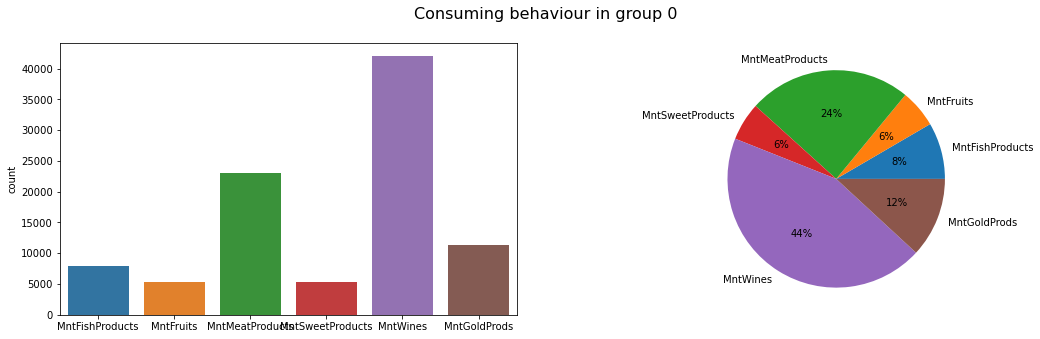

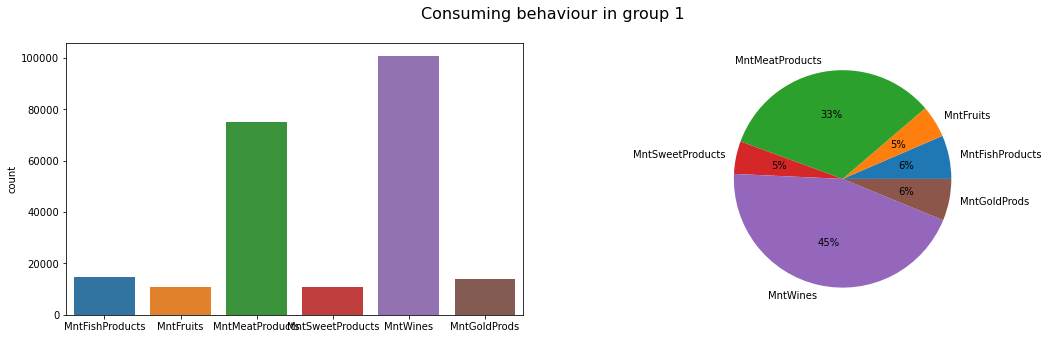

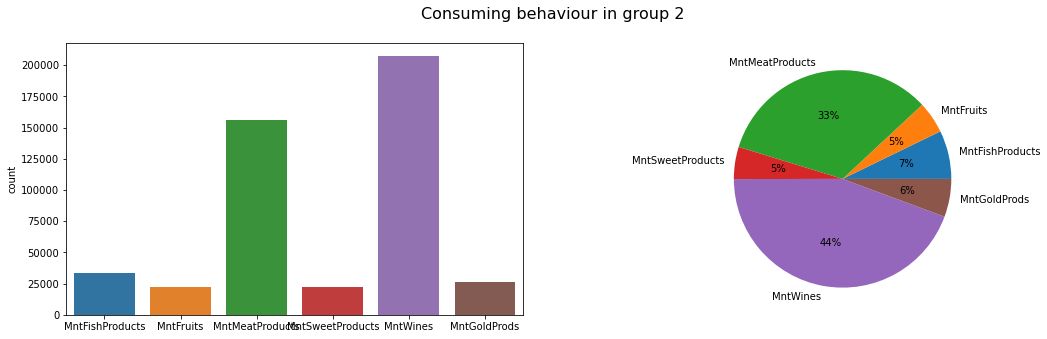

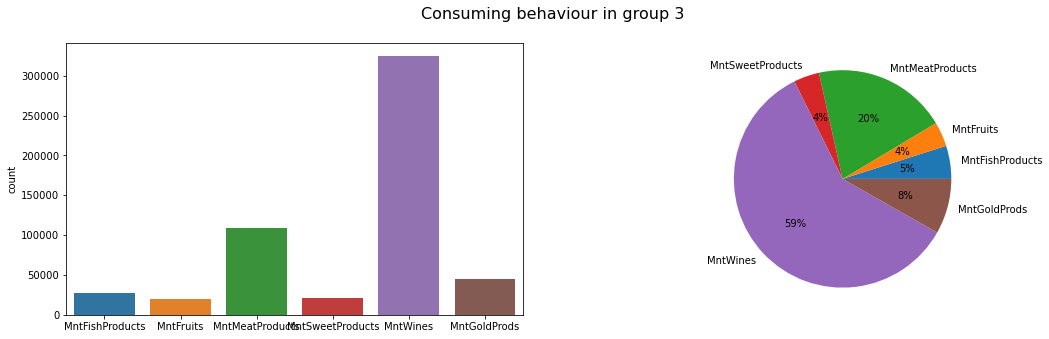

In [30]:


consume = []
for i in range(n):
    consume.append(Group[i][Mnt].sum(axis = 0))

print(Mnt)
cnt = 0


consume_prods = []
for i in range(n):
    consume_prods.append(Group[i][Mnt_prods].sum(axis = 0))

print(Mnt)




#MntRegularProds = MntTotal-MntGoldProds. WHY?


Data_consumption = pd.DataFrame()
for i in range(len(consume)):
    Data_consumption["Group"+str(i)] = consume[i].values
print(Data_consumption)


for i in range(len(consume_prods)):
    
    plt.figure(figsize=(18,5))
    plt.suptitle('Consuming behaviour in group ' + str(i), fontsize = 16)
    plt.subplot(1,2,1)
    sns.barplot(x = consume_prods[i].index, y =  consume_prods[i].values)
    
    plt.ylabel('count')
    
    plt.subplot(1,2,2)
    plt.pie(data = consume_prods[i], x = consume_prods[i].values, labels = consume_prods[i].index, autopct='%.0f%%')
    plt.show()

### Purchasing behaviour
Here we will see how groups prefer to purchase products.

   Group0  Group1  Group2  Group3
0     404     933    2024    2443
1     910     239     468    3480
2    1639    1548    3046    6607
3    1215     897    1861    4994
4    2499     790    1418    7058


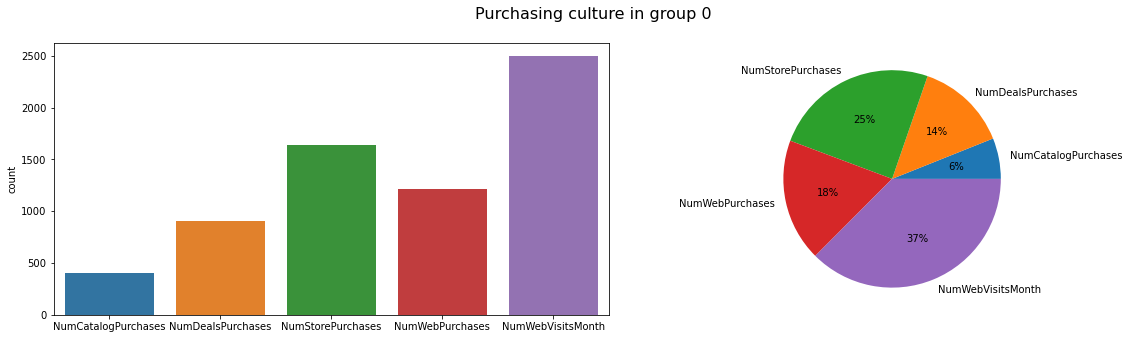

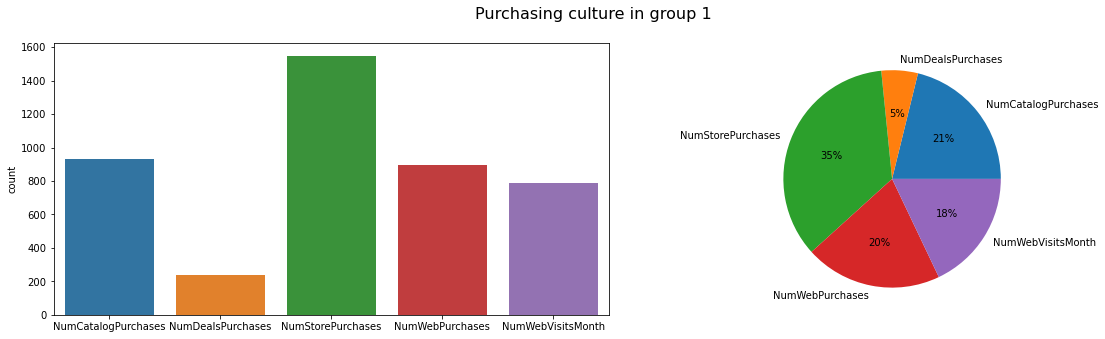

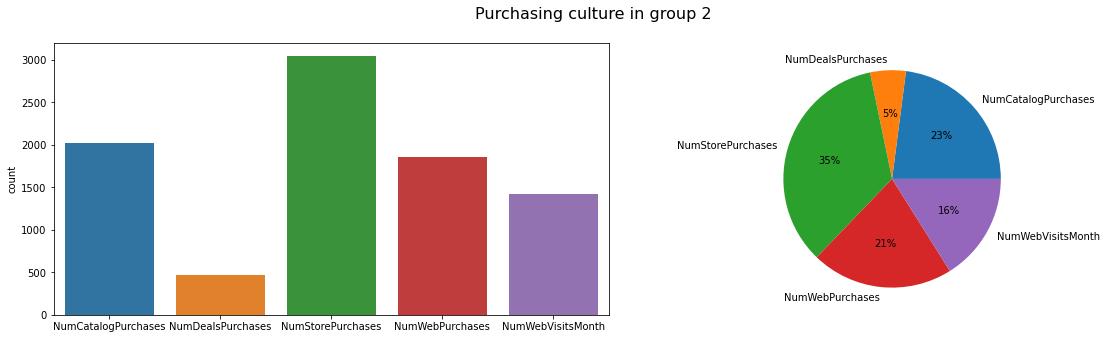

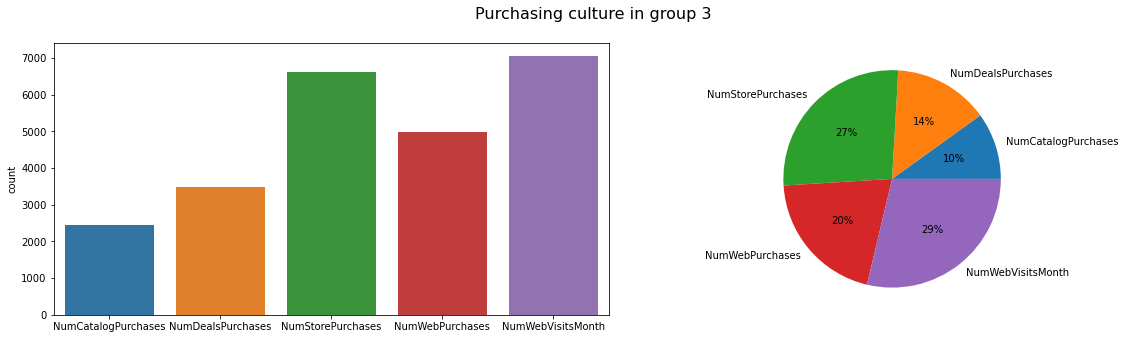

In [31]:
buying = []
for i in range(n):
    buying.append(Group[i][Num].sum(axis = 0))


#MntRegularProds = MntTotal-MntGoldProds. WHY?


Data_buying = pd.DataFrame()
for i in range(len(buying)):
    Data_buying["Group"+str(i)] = buying[i].values
print(Data_buying)


for i in range(len(buying)):
    
    plt.figure(figsize=(20,5))
    plt.subplots_adjust(wspace=0.01)
    plt.suptitle('Purchasing culture in group ' + str(i), fontsize = 16)
    plt.subplot(1,2,1)
    sns.barplot(x = buying[i].index, y =  buying[i].values)
    
    plt.ylabel('count')
    
    plt.subplot(1,2,2)
    plt.pie(data = buying[i], x = buying[i].values, labels = buying[i].index, autopct='%.0f%%')
    plt.show()

We will label consumers as young if their age is below 0.25 quantile of overall customers age distribution.

**Insights**:

>The most popular products are *Wines* and *Meat*. The least popular is *Sweets*.

>The most preferable way of buying is in the *Store*.

>lder customers tend to buy more *Wines* and less *Meat*.

>ounger customers tend to buy more *Gold*.


***Middle income groups***:

**Group0, Group3** - Mostly using our service for *Wines*, *Meat* and *Gold* products. Usually purchasing with deals more often, have large number of web visits.

***High income groups***:

**Group1, Group2** - Buying all kinds of products. Prefer purchasing via catalog, followed web purchases. Have less number of web visits.



In [32]:
print(Cmp)

['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'AcceptedCmpOverall']


## Marketing campaigns analysis
Time to analyse effectivenes of marketing campaigns based on affected customers and groups. We will compare impact of campaigns and consuming and buying behaviours of each group to make suggestions on improvement.

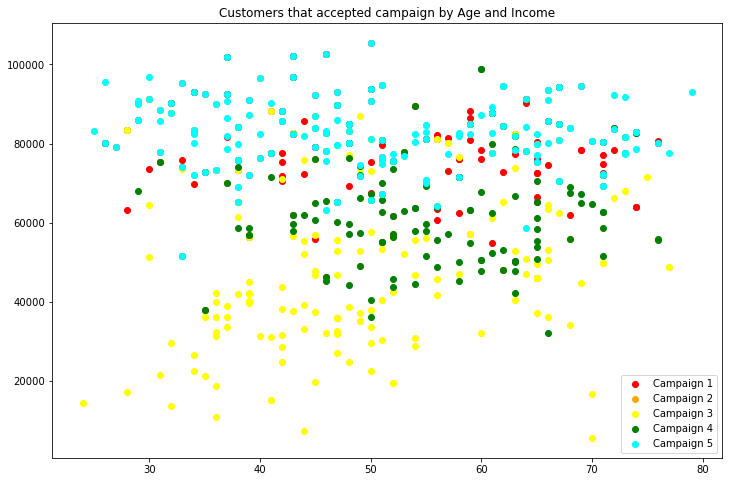

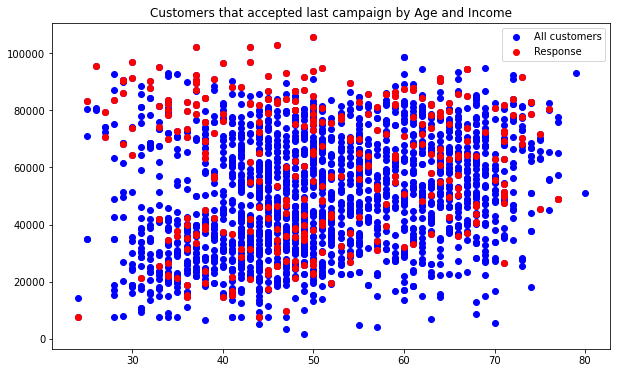

In [33]:
clr = ["red","orange","yellow","green","cyan","blue"]
plt.figure(figsize = (12,8))
for i in range(5):
    plt.scatter(data = Data_cleaned[Data_cleaned["AcceptedCmp"+str(i+1)]==1], x = "Age", y = "Income", color = clr[i])
plt.title("Customers that accepted campaign by Age and Income")

plt.legend(labels = ["Campaign 1","Campaign 2","Campaign 3","Campaign 4","Campaign 5"])
plt.figure(figsize = (10,6))
plt.scatter(data = Data_cleaned, x = "Age", y = "Income", color = "blue")    
plt.scatter(data = Data_cleaned[Data_cleaned["Response"]==1], x = "Age", y = "Income", color = "red")
plt.title("Customers that accepted last campaign by Age and Income")
plt.legend(labels = ["All customers","Response"])

In [34]:
def campaign_acceptance(dataset):
    Data_cmp_acc = []
    
    for i in range(len(Cmp)-2):
        Data_cmp_acc.append(dataset[dataset["AcceptedCmp"+str(i+1)]==1])      
    Data_cmp_acc.append(dataset[dataset["Response"]==1])

    Data_cmp_dec = []
    
    for i in range(len(Cmp)-2):
        Data_cmp_dec.append(dataset[dataset["AcceptedCmp"+str(i+1)]==0])      
    Data_cmp_dec.append(dataset[dataset["Response"]==0])
    
    acc_rate = []
    for i in range(6):
        
        acc_rate.append(Data_cmp_acc[i].shape[0]/(Data_cmp_acc[i].shape[0]+Data_cmp_dec[i].shape[0]))
    return acc_rate

def campaign_mnt_rate(dataset):
    Data_cmp_acc = []
    lbl = np.array(["Campaign1","Campaign2","Campaign3","Campaign4","Campaign5","Response"])
    for i in range(len(Cmp)-2):
        Data_cmp_acc.append(dataset[dataset["AcceptedCmp"+str(i+1)]==1])      
    Data_cmp_acc.append(dataset[dataset["Response"]==1])

    Data_cmp_dec = []
    
    for i in range(len(Cmp)-2):
        Data_cmp_dec.append(dataset[dataset["AcceptedCmp"+str(i+1)]==0])      
    Data_cmp_dec.append(dataset[dataset["Response"]==0])


    consume_prods_acc = []
    consume_prods_dec = []
    consume_prods = []
    Mnt_rate = []
    for i in range(6):
        consume_prods_acc.append(Data_cmp_acc[i][Mnt_prods].sum(axis = 0))
        consume_prods_dec.append(Data_cmp_dec[i][Mnt_prods].sum(axis = 0))
        consume_prods.append(consume_prods_dec[i]+consume_prods_acc[i])
    for i in range(6):
        Mnt_rate.append(consume_prods_acc[i].values.sum()/consume_prods[i].sum())
    return Mnt_rate
    

def campaign_impact(dataset, dataset_name):
    Data_cmp_acc = []
    lbl = np.array(["Campaign1","Campaign2","Campaign3","Campaign4","Campaign5","Response"])
    for i in range(len(Cmp)-2):
        Data_cmp_acc.append(dataset[dataset["AcceptedCmp"+str(i+1)]==1])      
    Data_cmp_acc.append(dataset[dataset["Response"]==1])

    Data_cmp_dec = []
    
    for i in range(len(Cmp)-2):
        Data_cmp_dec.append(dataset[dataset["AcceptedCmp"+str(i+1)]==0])      
    Data_cmp_dec.append(dataset[dataset["Response"]==0])


    consume_prods_acc = []
    consume_prods_dec = []
    consume_prods = []
    acc_rate = []
    for i in range(6):
        consume_prods_acc.append(Data_cmp_acc[i][Mnt_prods].sum(axis = 0))
        consume_prods_dec.append(Data_cmp_dec[i][Mnt_prods].sum(axis = 0))
        consume_prods.append(consume_prods_dec[i]+consume_prods_acc[i])
        acc_rate.append(Data_cmp_acc[i].shape[0]/(Data_cmp_acc[i].shape[0]+Data_cmp_dec[i].shape[0]))

    
    plt.title(dataset_name + ": Acceptance rate")
    labels = ["Cmp1","Cmp2","Cmp3","Cmp4","Cmp5","Response"]
    plt.bar(labels, acc_rate)
    
    plt.show()
    
    Data_consumption = pd.DataFrame()
    for i in range(len(consume)):
        Data_consumption["Campaign"+str(i)] = consume[i].values
    print(Data_consumption)
    #MntRegularProds = MntTotal-MntGoldProds. WHY?

    for i in range(6):
        
        
        
        plt.figure(figsize = (12,5))
        plt.suptitle(dataset_name+': Amount affected by ' + lbl[i], fontsize = 16)
        plt.bar(consume_prods_acc[i].index,  consume_prods_acc[i].values, color = "orange")
        plt.bar(consume_prods_dec[i].index,   consume_prods_dec[i].values, bottom = consume_prods_acc[i].values,color = "blue")
        plt.ylabel('Amount')
        plt.legend(labels = ["Accepted", "Not accepted"])
        ax = plt.bar(consume_prods_acc[i].index,  consume_prods_acc[i].values, color = "orange")
        
        
        Mnt_acc = pd.Series(index = ["Dec","Acc"])
        Mnt_acc["Dec"] = consume_prods[i].sum()
        Mnt_acc["Acc"] = consume_prods_acc[i].values.sum()
        
        plt.show()
        plt.figure(figsize = (5,5))
        plt.pie(data = Mnt_acc, x = Mnt_acc.values,labels = Mnt_acc.index, autopct='%.0f%%')
        plt.show()
        
        plt.figure(figsize=(18,5))
        plt.suptitle(dataset_name + ': Impact on consuming behaviour by ' + lbl[i], fontsize = 16)
        
        plt.subplot(1,2,1)
        plt.title("Consuming behaviour")
        plt.pie(data = consume_prods[i], x = consume_prods[i].values, labels = consume_prods[i].index, autopct='%.0f%%')

        plt.subplot(1,2,2)
        plt.title("Accepted campaign", color = "b")
        plt.pie(data = consume_prods_acc[i], x = consume_prods_acc[i].values, labels = consume_prods_acc[i].index, autopct='%.0f%%')
        plt.show()

### Acceptance rate by groups

     Group0    Group1    Group2    Group3  Campaign
0  0.018182  0.184834  0.168269  0.021867      Cmp1
1  0.002597  0.023697  0.031250  0.009251      Cmp2
2  0.098701  0.099526  0.064904  0.064760      Cmp3
3  0.020779  0.113744  0.103365  0.074853      Cmp4
4  0.010390  0.246445  0.201923  0.017662      Cmp5
5  0.103896  0.289100  0.257212  0.105130  Response


<AxesSubplot:title={'center':'Acceptance rate of campaigns by groups'}, xlabel='Group', ylabel='acceptance_rate'>

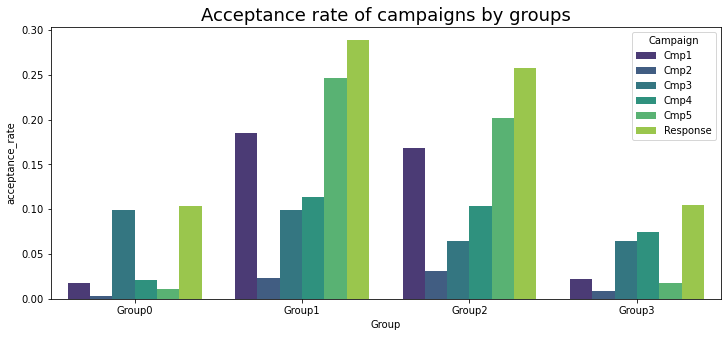

In [35]:
cols = ["Group0","Group1","Group2","Group3", "Campaign"]
Accdf = pd.DataFrame(columns = cols)

for j in range(n):
    accrate = np.array(campaign_acceptance(Group[j]))
    
    Accdf[cols[j]] = accrate.T


lbl = np.array(["Cmp1","Cmp2","Cmp3","Cmp4","Cmp5","Response"])
Accdf[cols[-1]] = lbl.T

print(Accdf)
Accdf = pd.melt(Accdf, id_vars="Campaign", var_name="Group", value_name="acceptance_rate")
plt.figure(figsize = (12,5))
plt.title("Acceptance rate of campaigns by groups", fontsize = 18)
sns.barplot(data = Accdf, x = "Group", y = "acceptance_rate", hue = "Campaign", palette = 'viridis')

## How campaigns performed

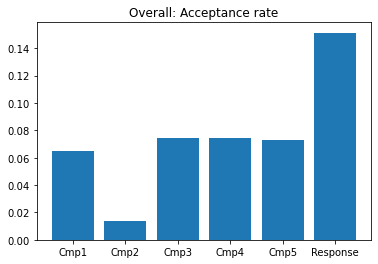

   Campaign0  Campaign1  Campaign2  Campaign3
0       8009      14669      33705      26861
1       5362      10814      22112      19920
2      11313      14020      26407      44790
3      23118      74988     155855     108779
4      72642     198251     414926     456381
5       5404      11018      22313      20814
6      42062     100782     207348     324797
7      83955     212271     441333     501171


C:\Users\rxwot\AppData\Local\Temp/ipykernel_13856/2658096329.py:97: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Mnt_acc = pd.Series(index = ["Dec","Acc"])


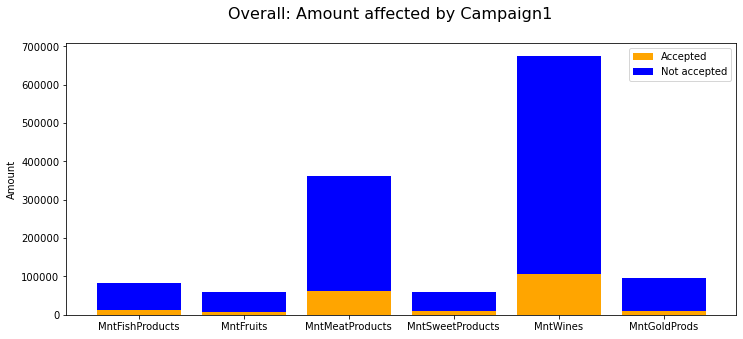

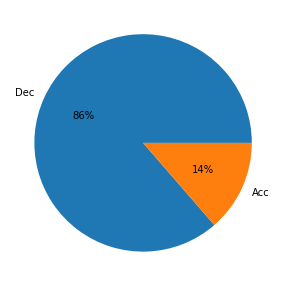

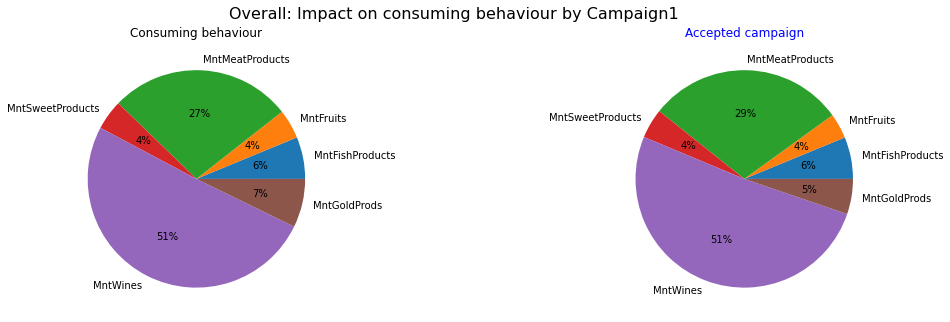

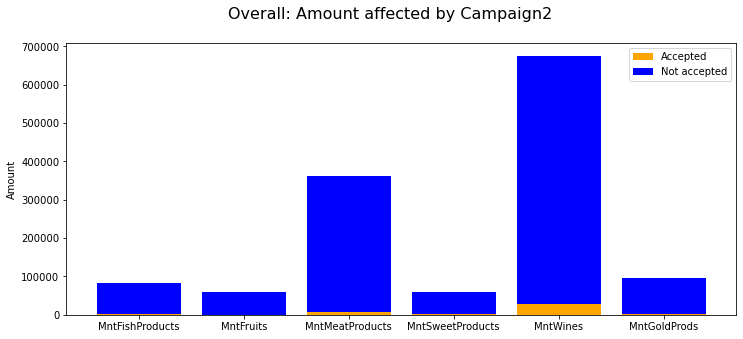

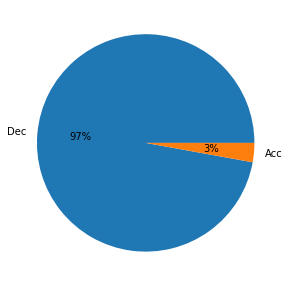

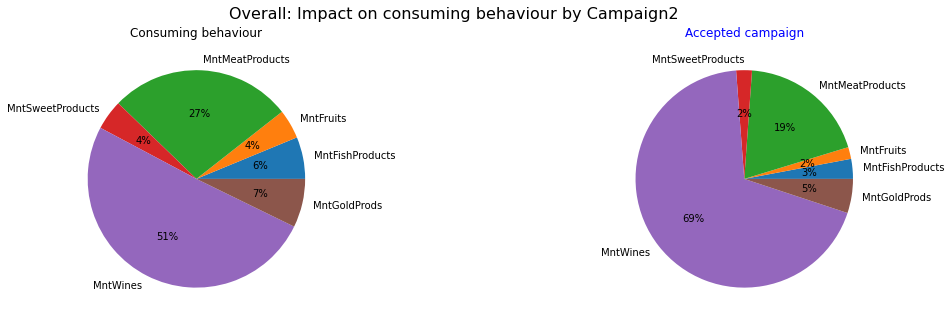

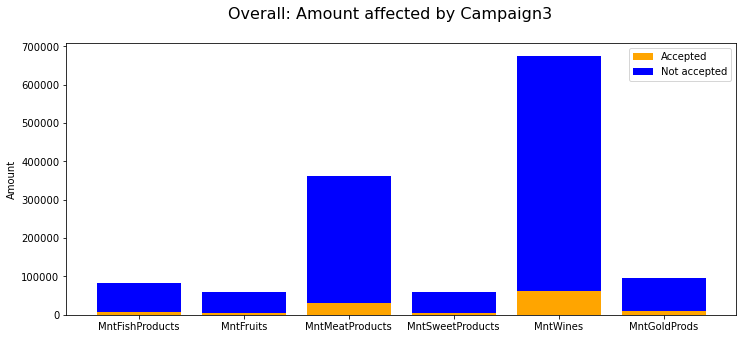

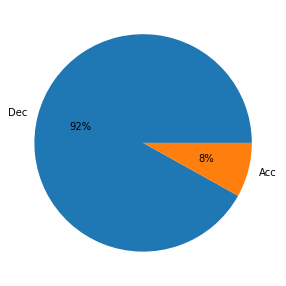

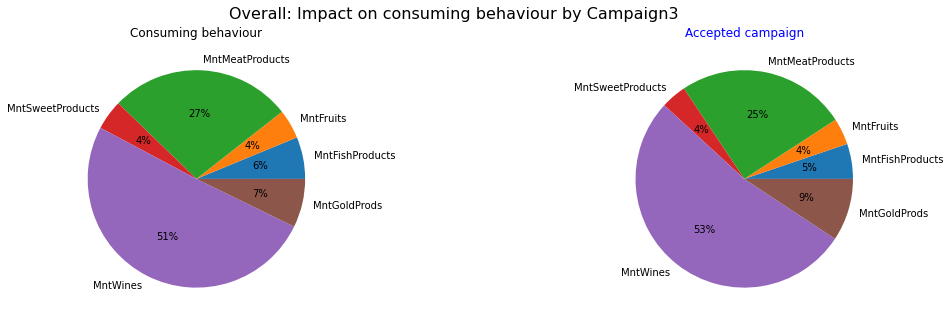

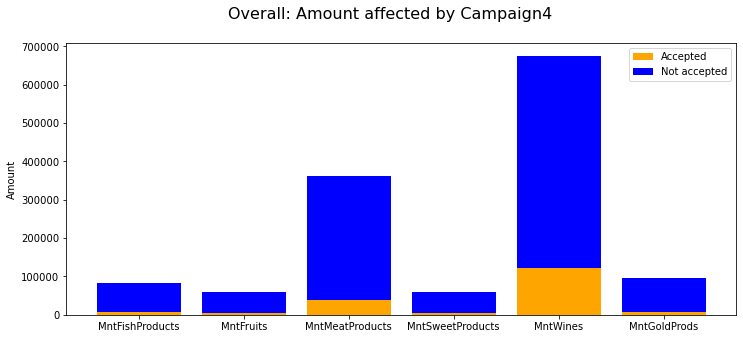

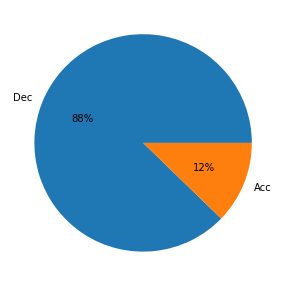

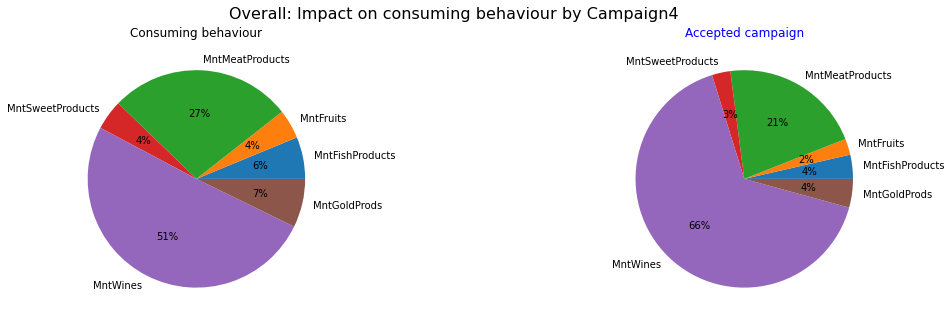

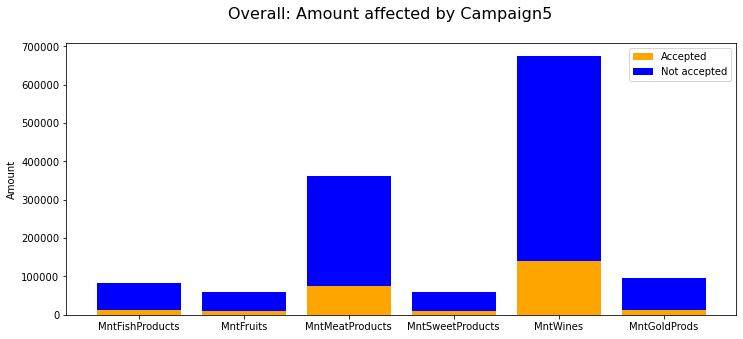

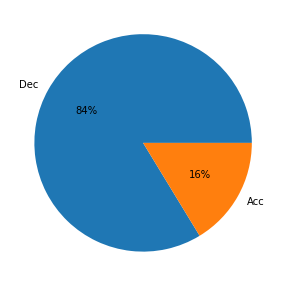

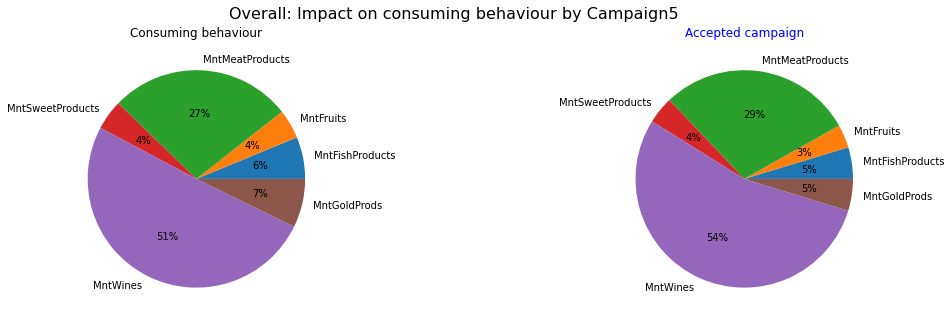

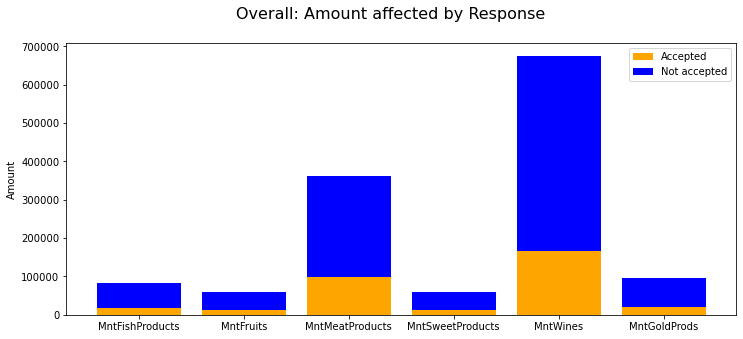

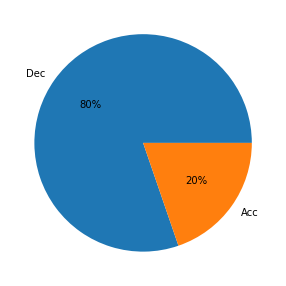

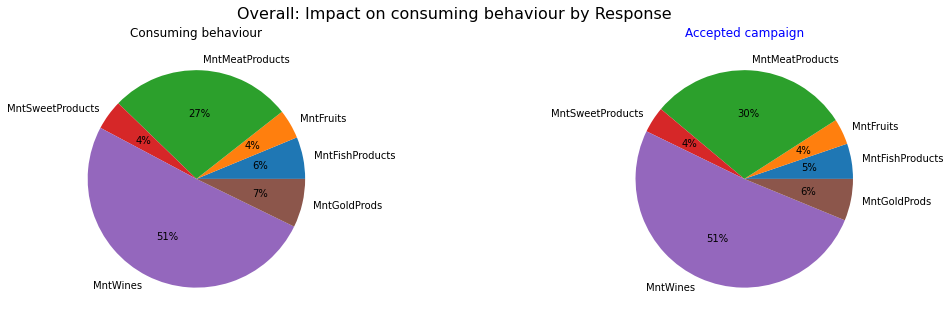

In [36]:
campaign_impact(Data_cleaned, "Overall")

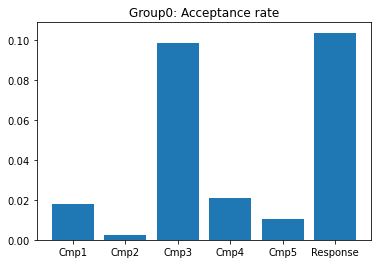

   Campaign0  Campaign1  Campaign2  Campaign3
0       8009      14669      33705      26861
1       5362      10814      22112      19920
2      11313      14020      26407      44790
3      23118      74988     155855     108779
4      72642     198251     414926     456381
5       5404      11018      22313      20814
6      42062     100782     207348     324797
7      83955     212271     441333     501171


C:\Users\rxwot\AppData\Local\Temp/ipykernel_13856/2658096329.py:97: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Mnt_acc = pd.Series(index = ["Dec","Acc"])


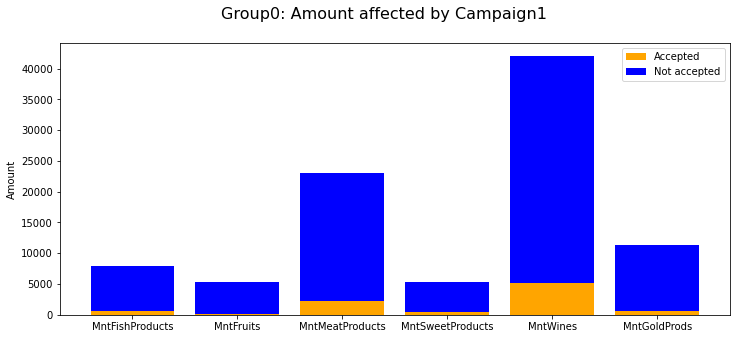

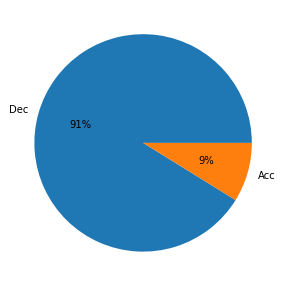

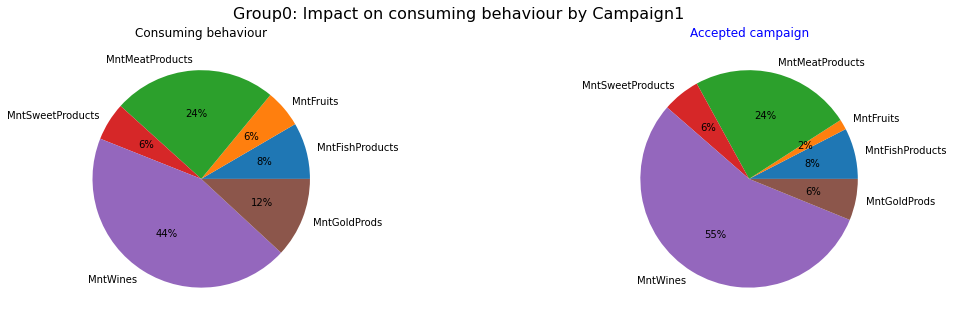

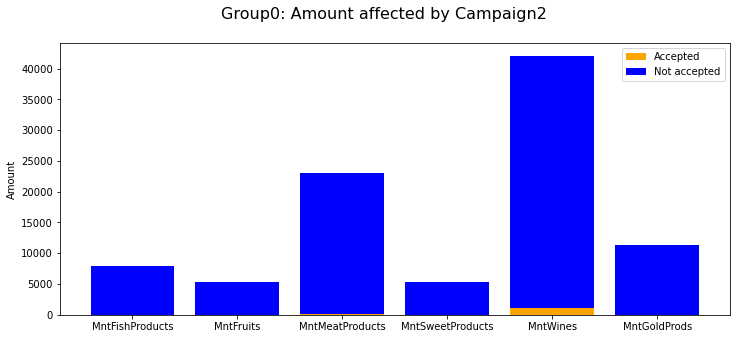

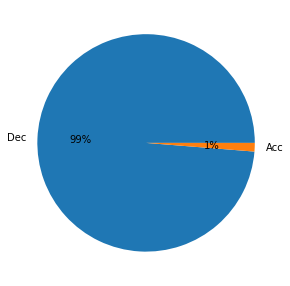

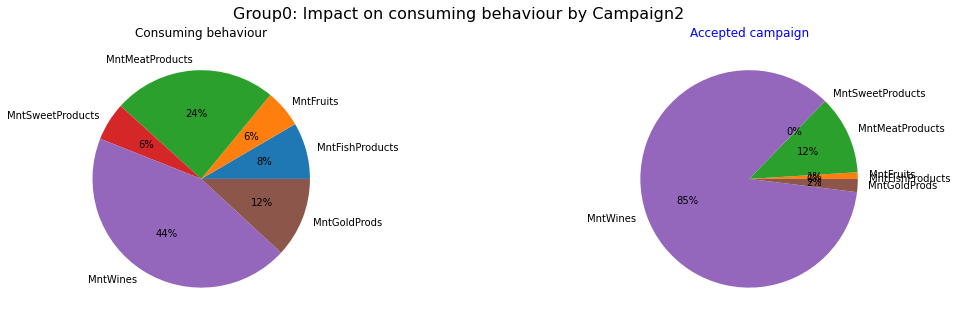

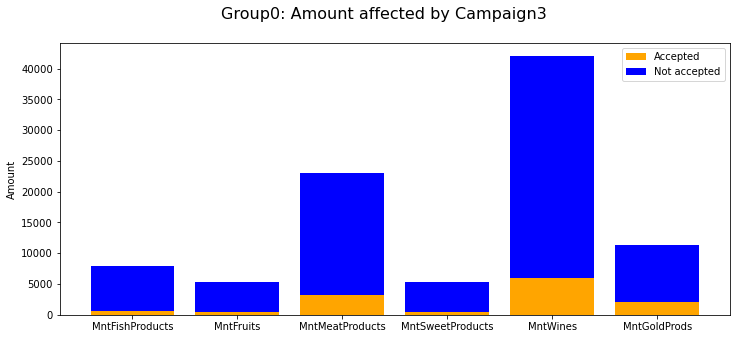

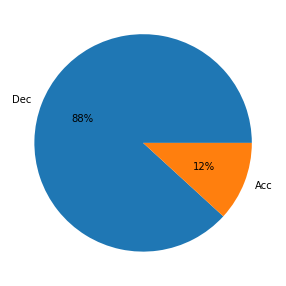

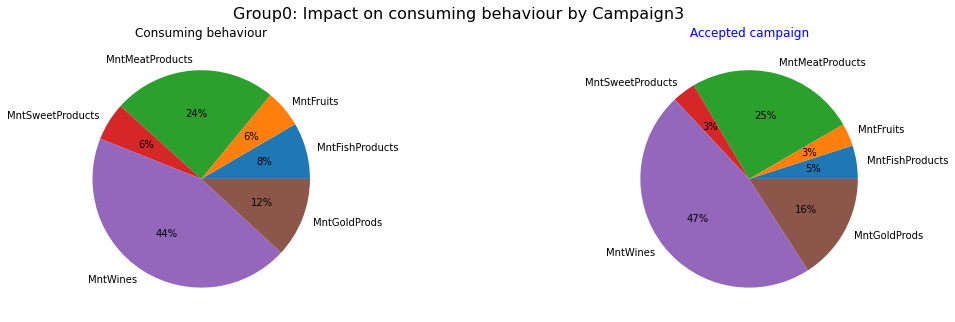

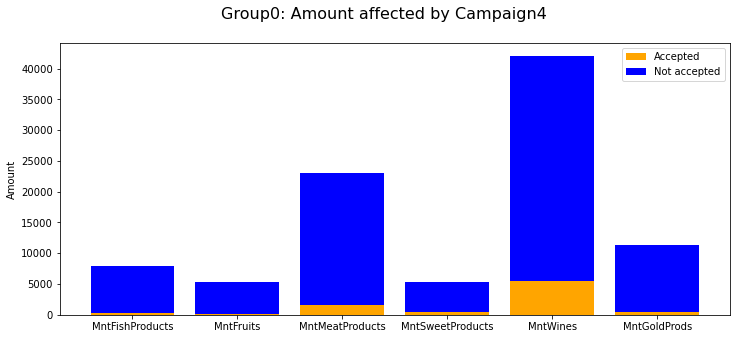

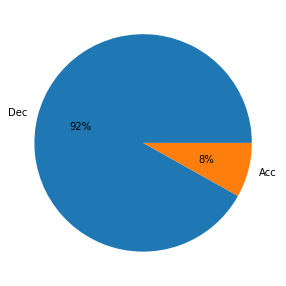

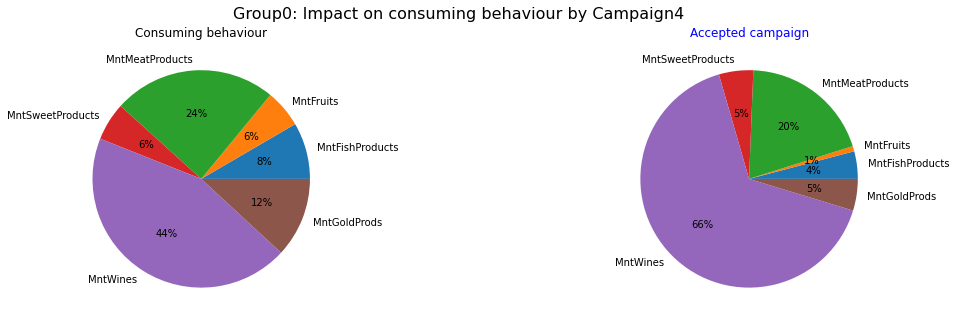

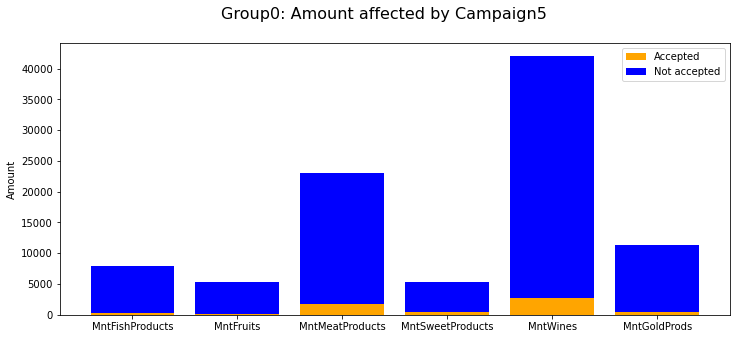

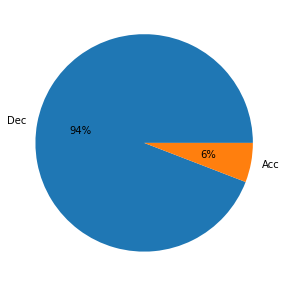

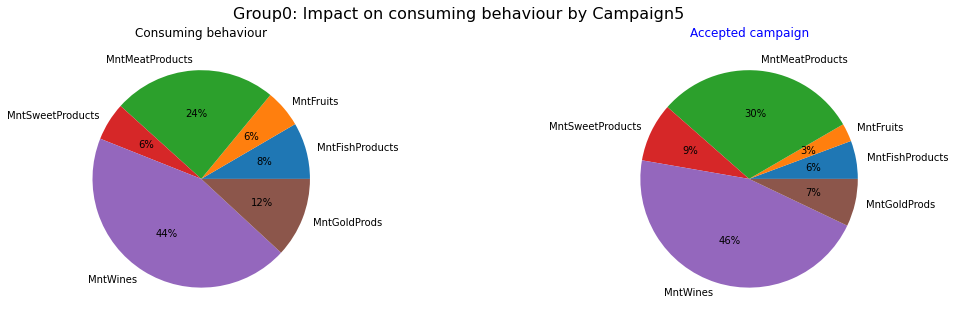

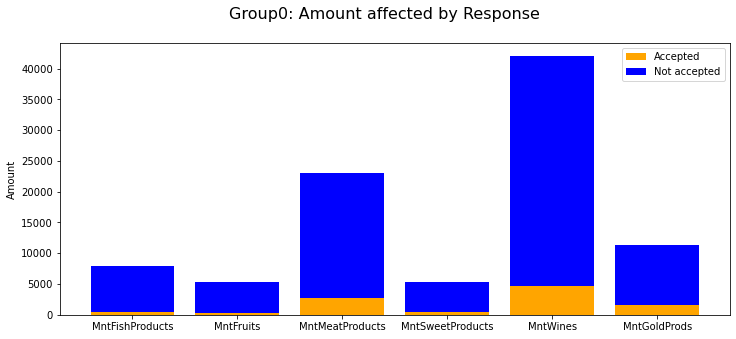

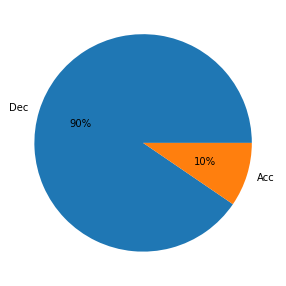

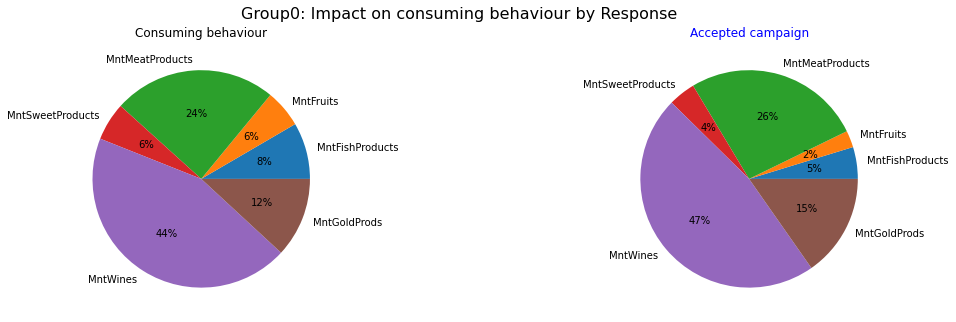

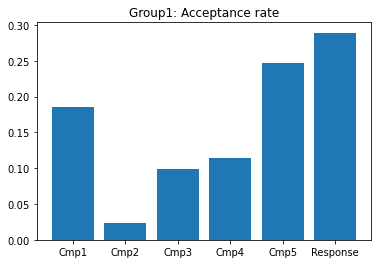

   Campaign0  Campaign1  Campaign2  Campaign3
0       8009      14669      33705      26861
1       5362      10814      22112      19920
2      11313      14020      26407      44790
3      23118      74988     155855     108779
4      72642     198251     414926     456381
5       5404      11018      22313      20814
6      42062     100782     207348     324797
7      83955     212271     441333     501171


C:\Users\rxwot\AppData\Local\Temp/ipykernel_13856/2658096329.py:97: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Mnt_acc = pd.Series(index = ["Dec","Acc"])


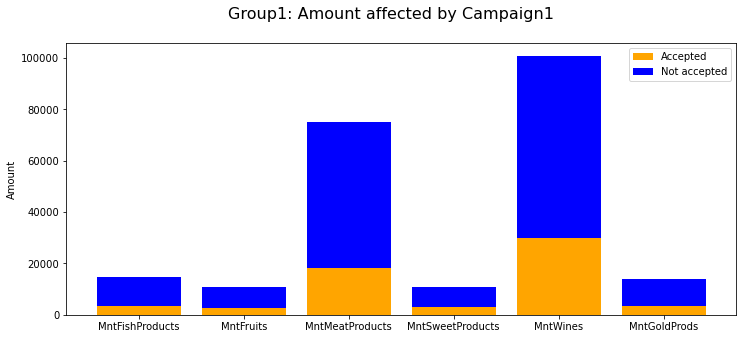

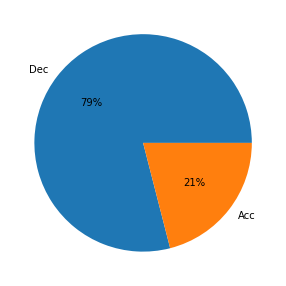

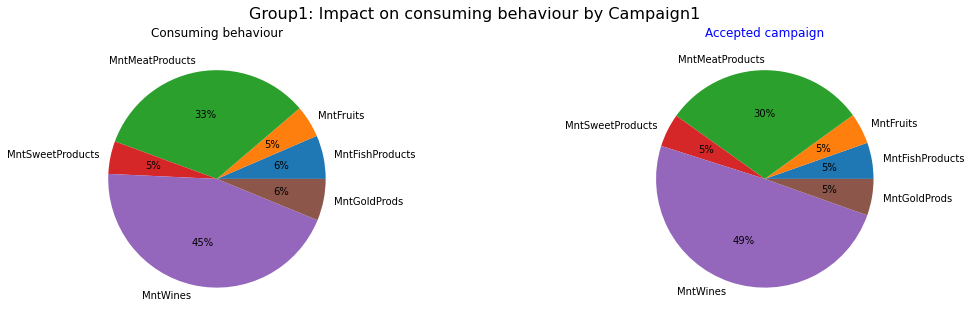

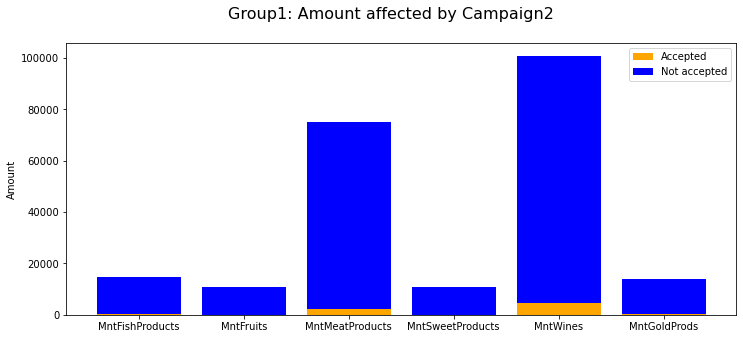

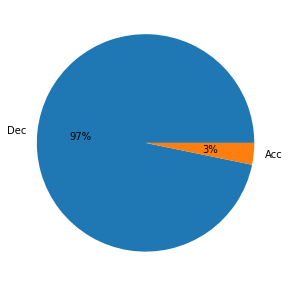

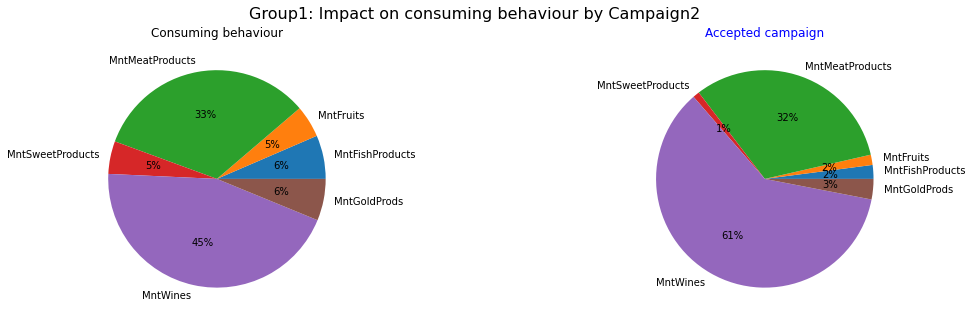

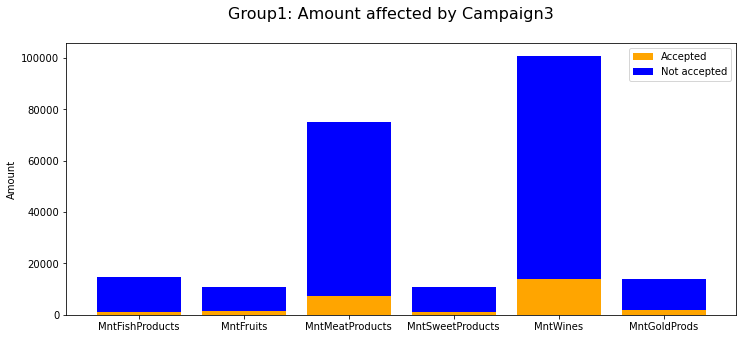

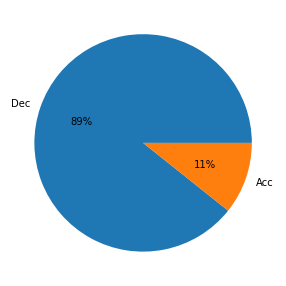

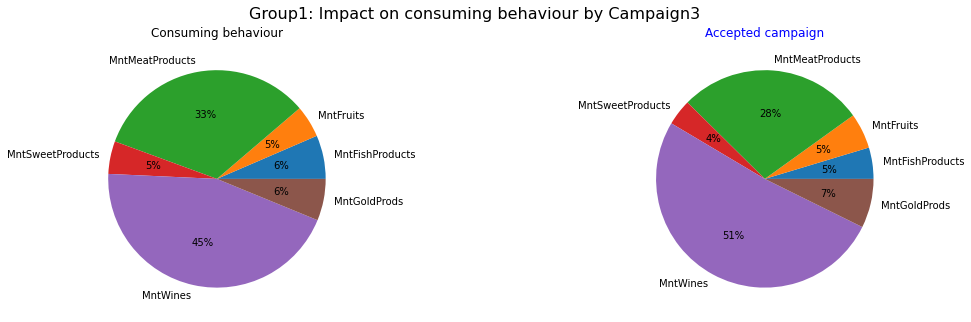

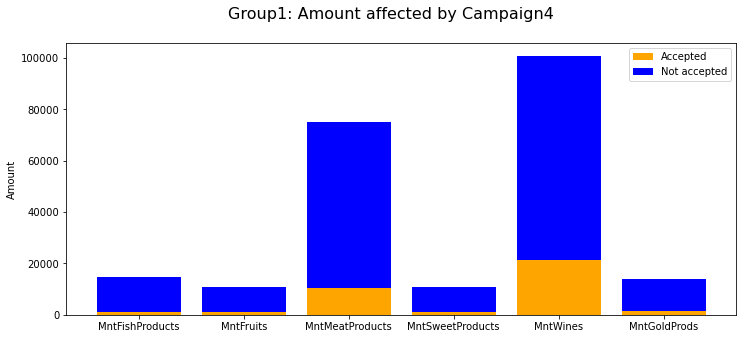

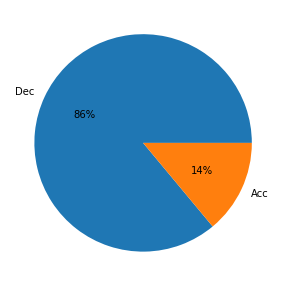

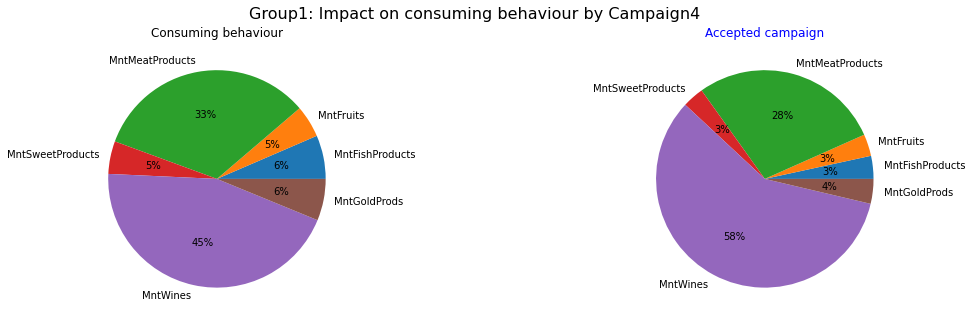

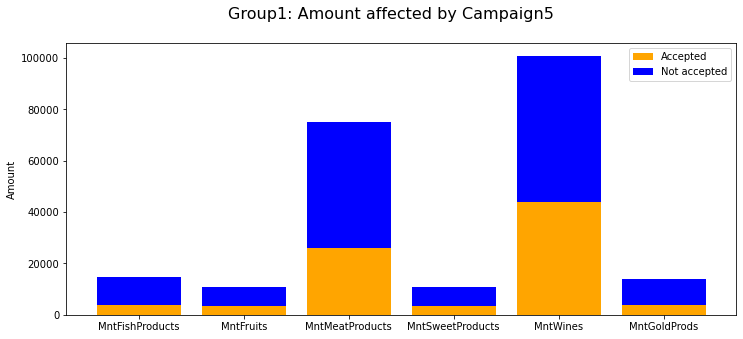

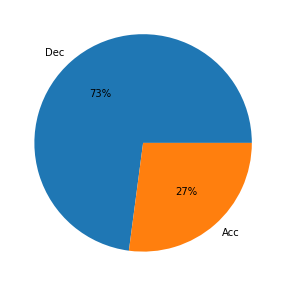

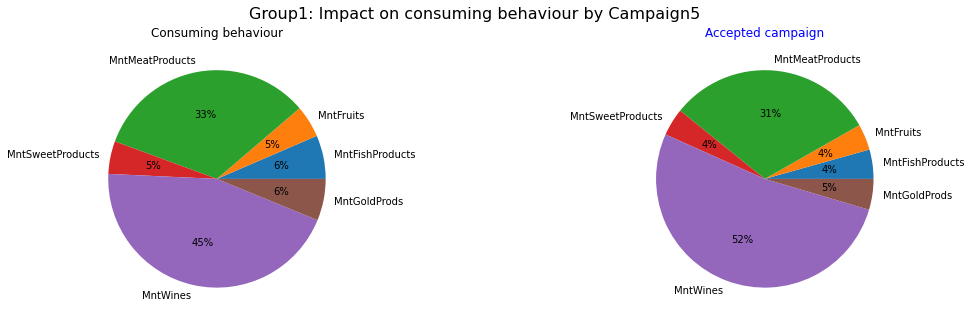

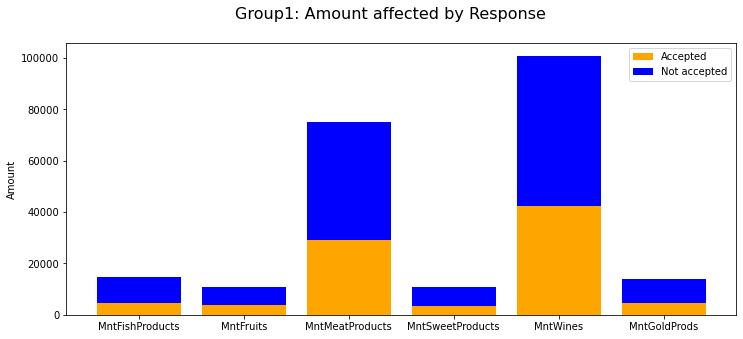

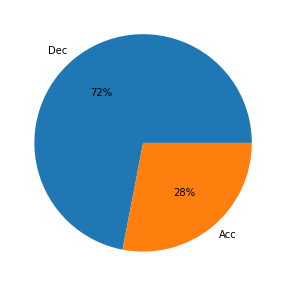

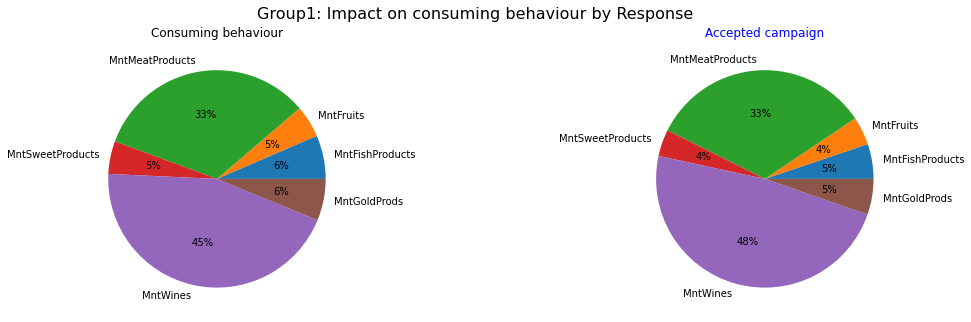

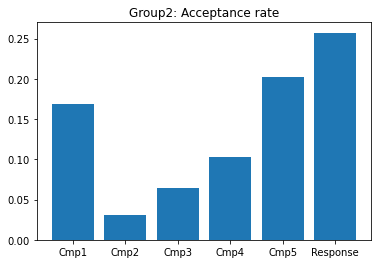

   Campaign0  Campaign1  Campaign2  Campaign3
0       8009      14669      33705      26861
1       5362      10814      22112      19920
2      11313      14020      26407      44790
3      23118      74988     155855     108779
4      72642     198251     414926     456381
5       5404      11018      22313      20814
6      42062     100782     207348     324797
7      83955     212271     441333     501171


C:\Users\rxwot\AppData\Local\Temp/ipykernel_13856/2658096329.py:97: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Mnt_acc = pd.Series(index = ["Dec","Acc"])


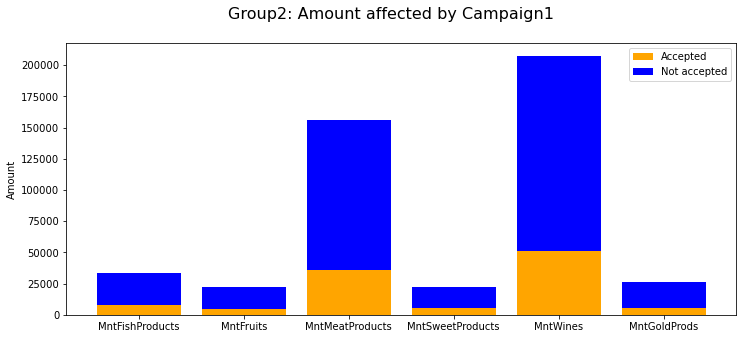

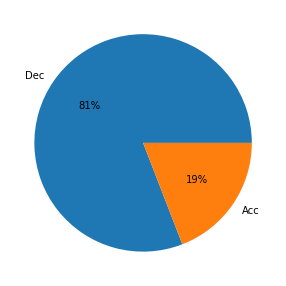

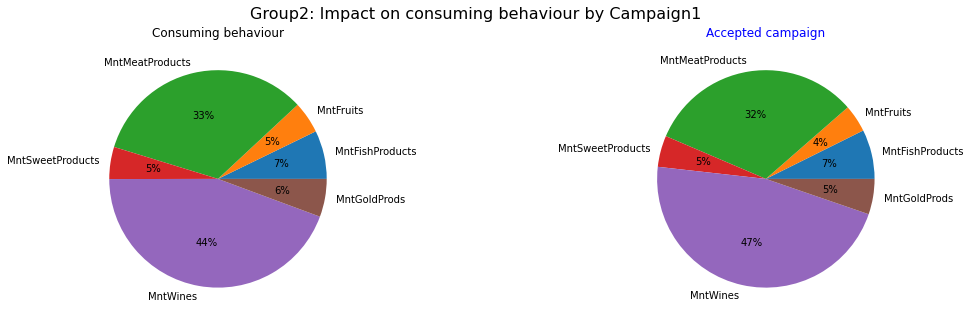

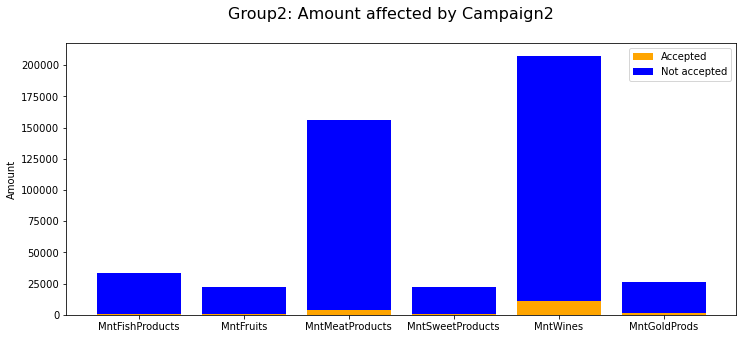

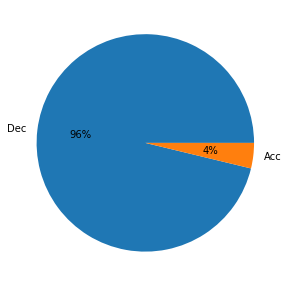

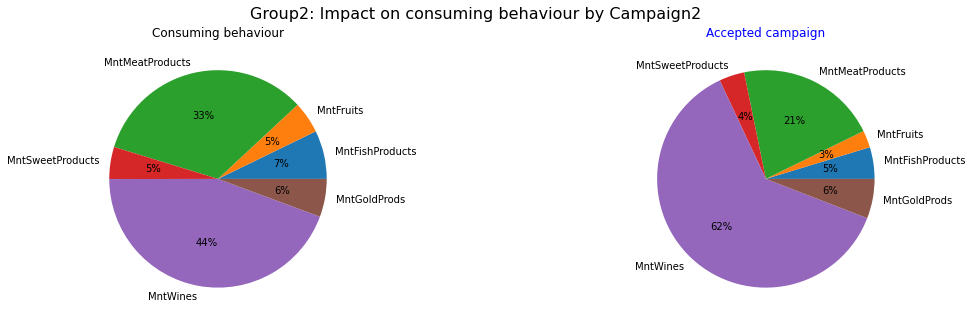

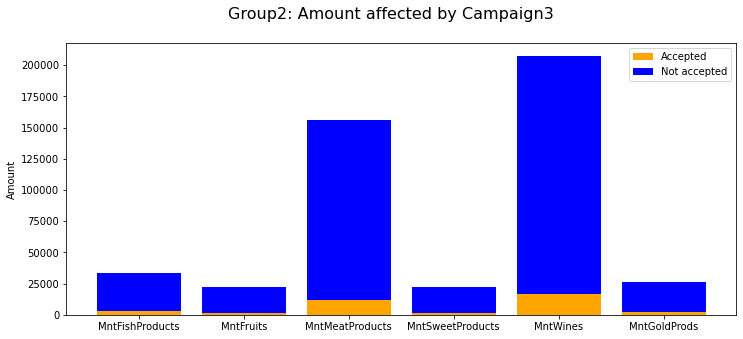

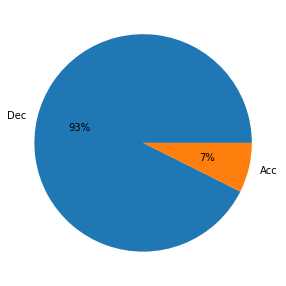

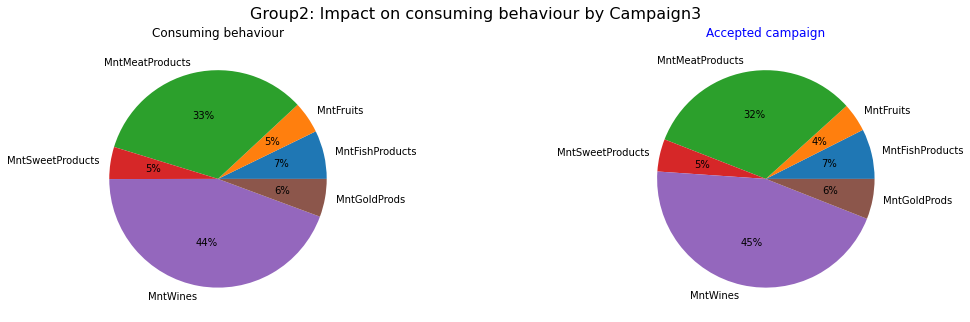

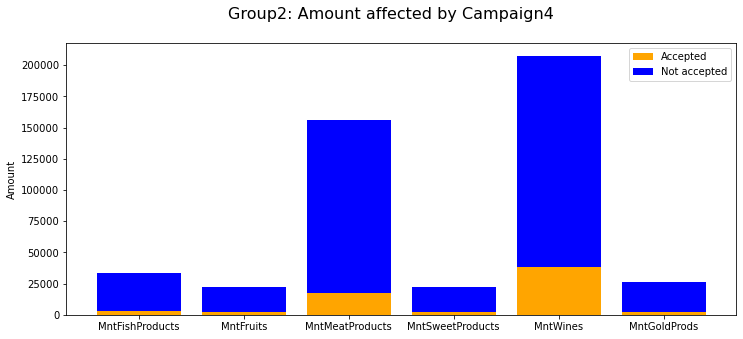

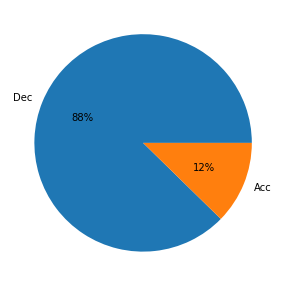

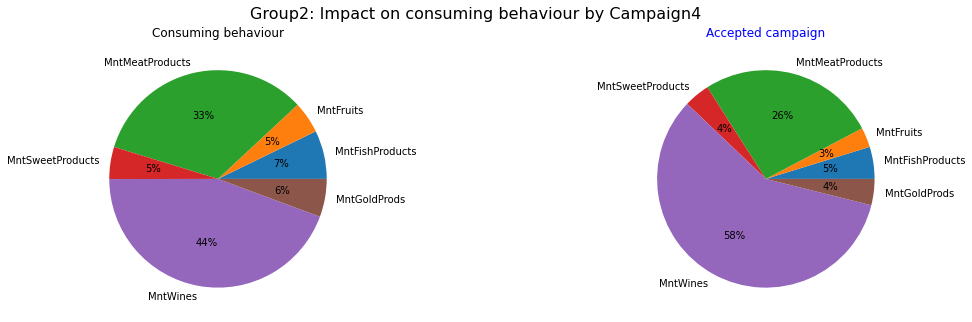

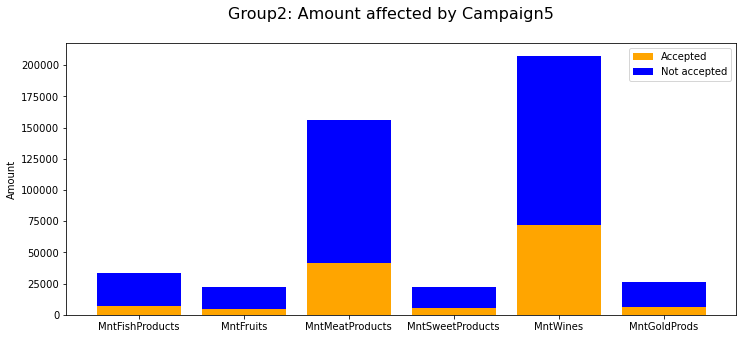

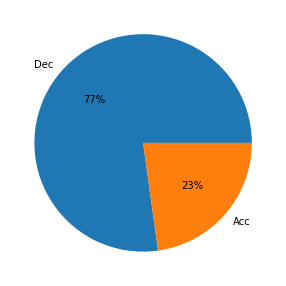

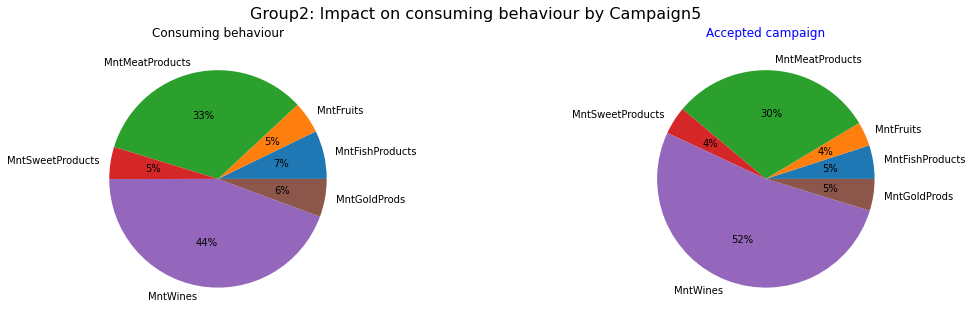

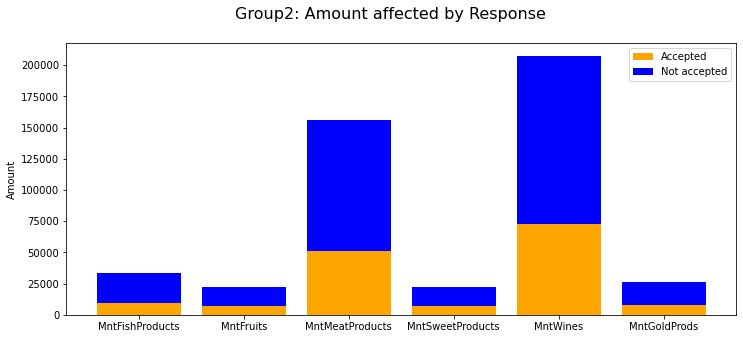

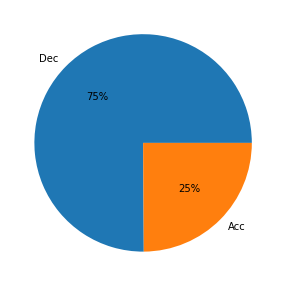

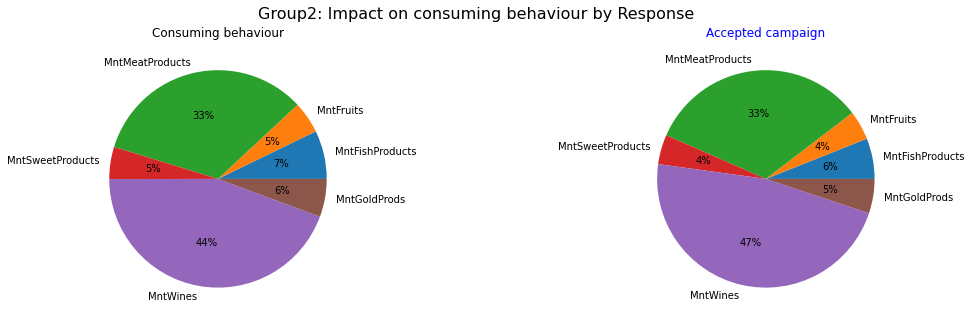

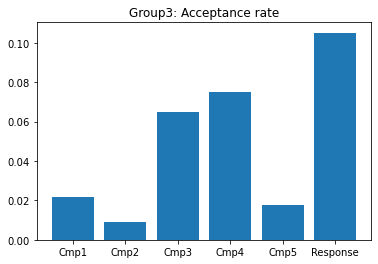

   Campaign0  Campaign1  Campaign2  Campaign3
0       8009      14669      33705      26861
1       5362      10814      22112      19920
2      11313      14020      26407      44790
3      23118      74988     155855     108779
4      72642     198251     414926     456381
5       5404      11018      22313      20814
6      42062     100782     207348     324797
7      83955     212271     441333     501171


C:\Users\rxwot\AppData\Local\Temp/ipykernel_13856/2658096329.py:97: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Mnt_acc = pd.Series(index = ["Dec","Acc"])


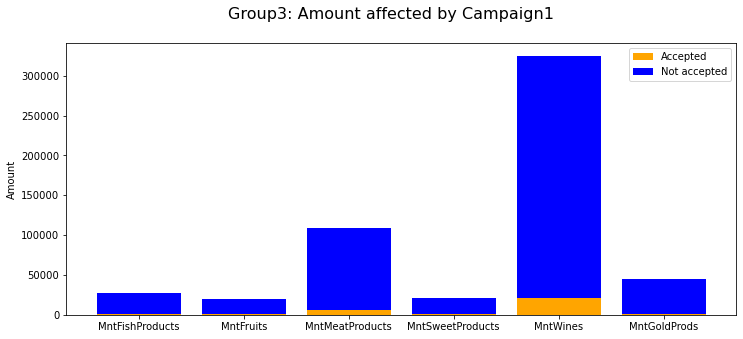

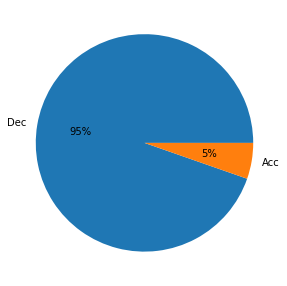

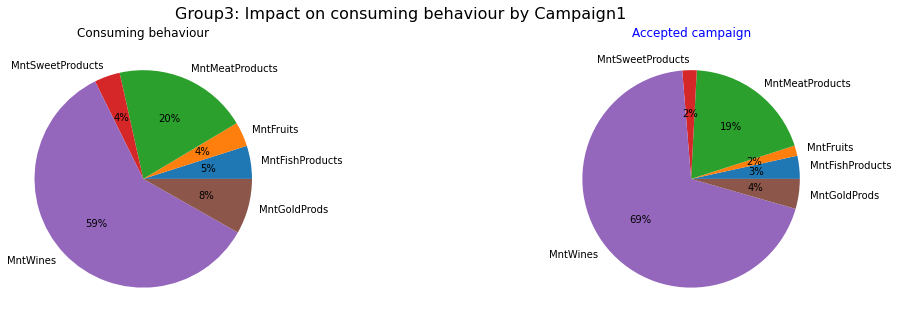

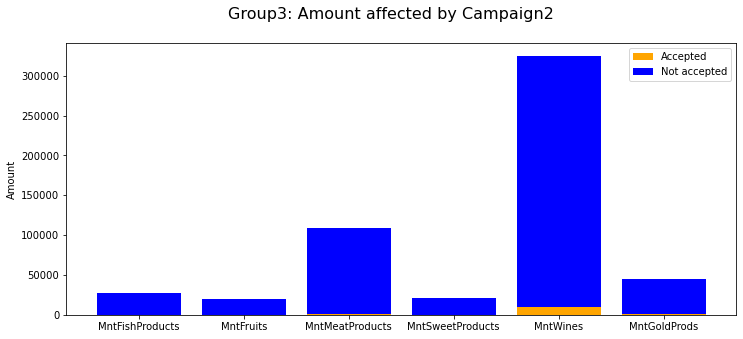

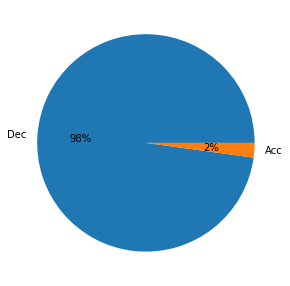

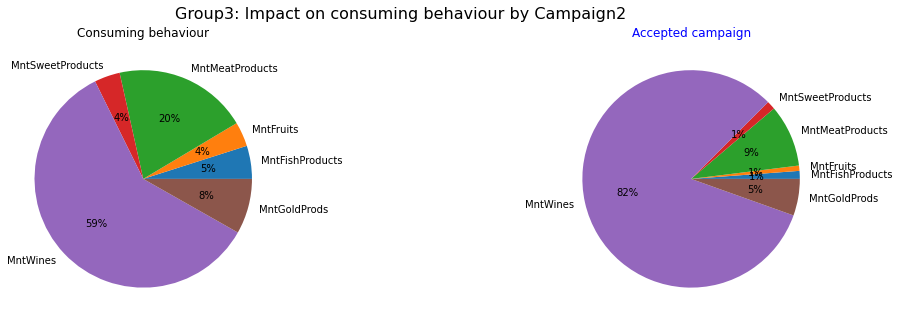

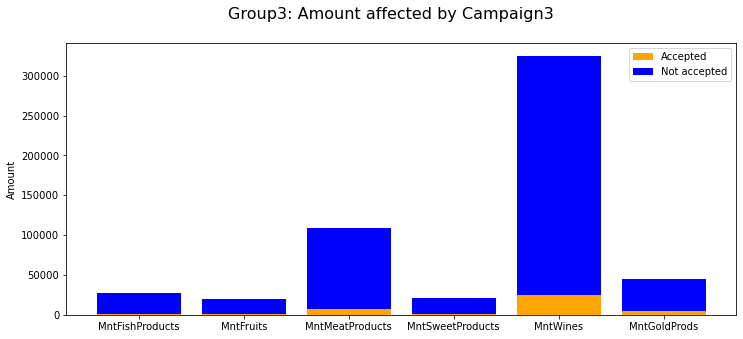

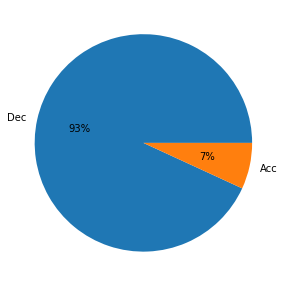

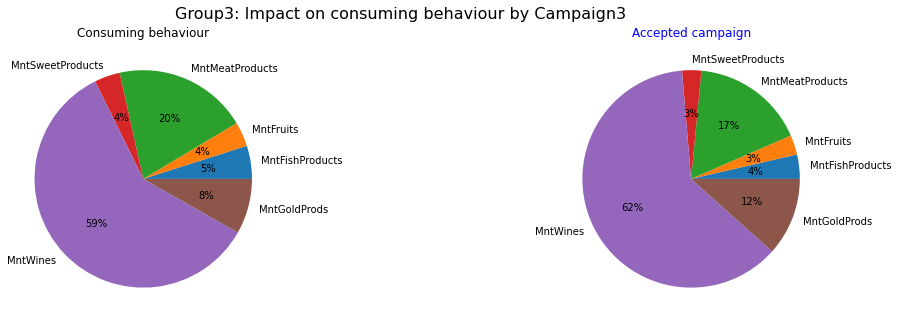

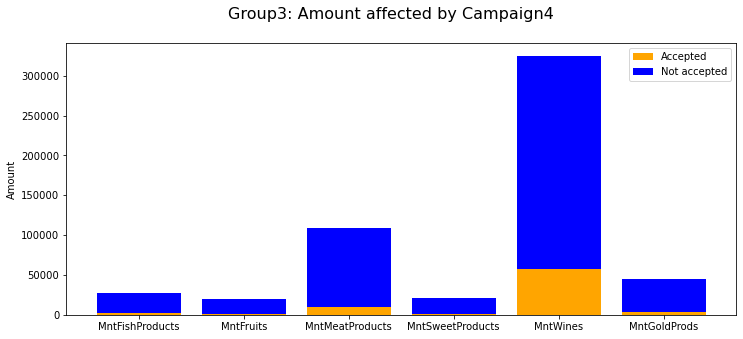

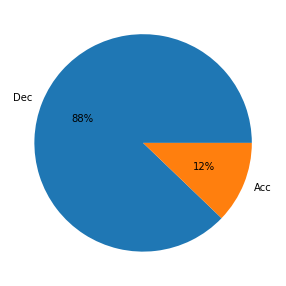

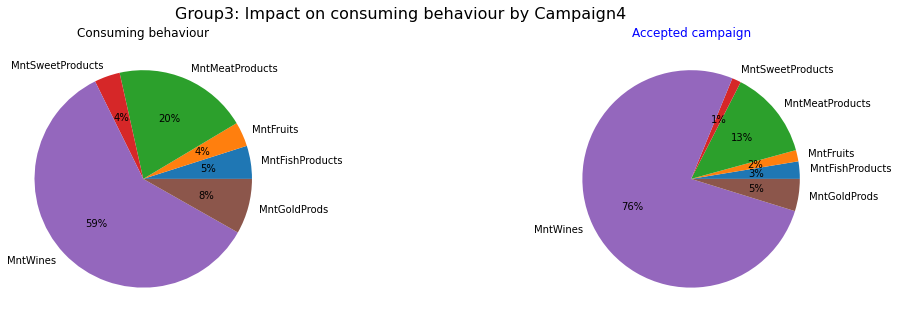

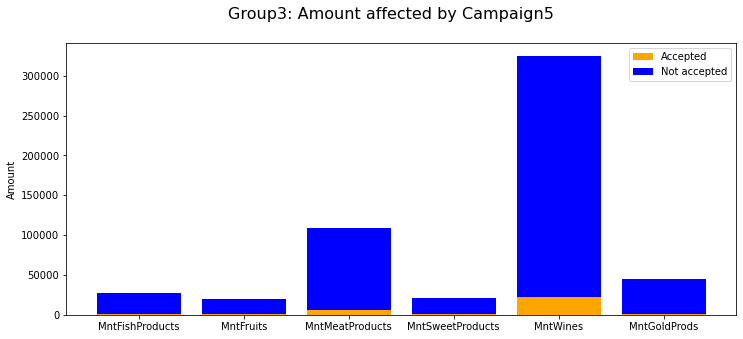

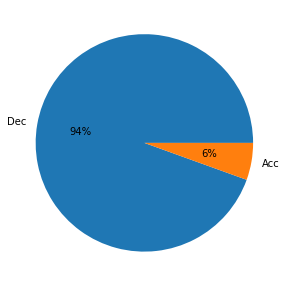

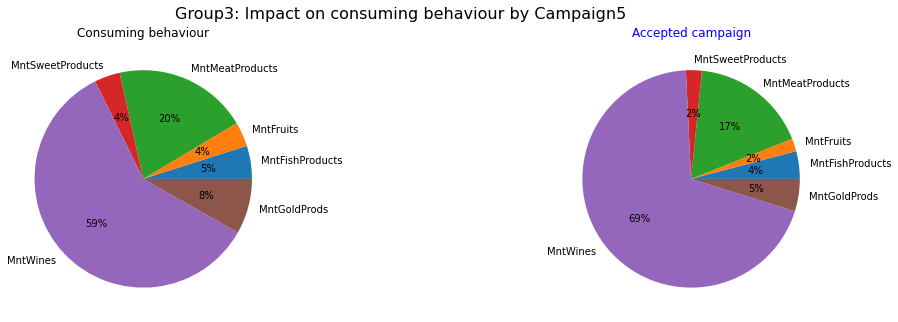

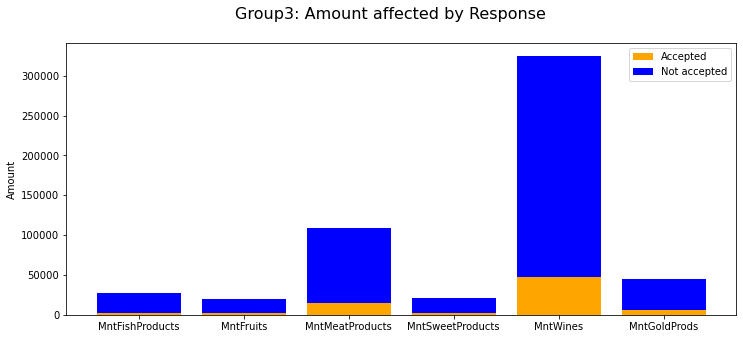

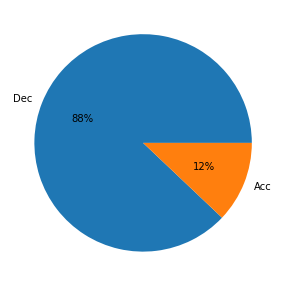

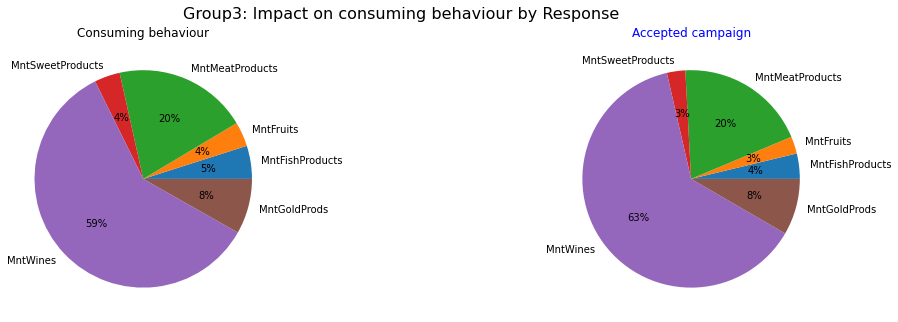

In [37]:
for i in range(n):
    campaign_impact(Group[i], "Group"+ str(i))

In [38]:
def campaign_impact_behaviour(dataset, dataset_name):
    Data_cmp_acc = []
    lbl = np.array(["Campaign1","Campaign2","Campaign3","Campaign4","Campaign5","Response"])
    for i in range(len(Cmp)-2):
        Data_cmp_acc.append(dataset[dataset["AcceptedCmp"+str(i+1)]==1])      
    Data_cmp_acc.append(dataset[dataset["Response"]==1])

    Data_cmp_dec = []
    
    for i in range(len(Cmp)-2):
        Data_cmp_dec.append(dataset[dataset["AcceptedCmp"+str(i+1)]==0])      
    Data_cmp_dec.append(dataset[dataset["Response"]==0])


    
    
    
    
    Nums_acc = []
    Nums_dec = []
    Nums = []
    acc_rate = []
    for i in range(6):
        Nums_acc.append(Data_cmp_acc[i][Num].sum(axis = 0))
        Nums_dec.append(Data_cmp_dec[i][Num].sum(axis = 0))
        Nums.append(Nums_dec[i]+Nums_acc[i])
        acc_rate.append(Data_cmp_acc[i].shape[0]/(Data_cmp_acc[i].shape[0]+Data_cmp_dec[i].shape[0]))

        
    plt.title(dataset_name + ": Acceptance rate")
    labels = ["Cmp1","Cmp2","Cmp3","Cmp4","Cmp5","Response"]
    plt.bar(labels, acc_rate)
    plt.show()
    
    
    Data_num = pd.DataFrame()
    for i in range(len(consume)):
        Data_num["Campaign"+str(i)] = buying[i].values
    print(Data_num)
    
    for i in range(6):
        plt.figure(figsize = (12,5))
        plt.suptitle(dataset_name+': Purchasing behaviour affected by ' + lbl[i], fontsize = 16)
        plt.bar(Nums_acc[i].index,  Nums_acc[i].values, color = "orange")
        plt.bar(Nums_dec[i].index,   Nums_dec[i].values, bottom = Nums_acc[i].values,color = "blue")
        plt.legend(labels = ["Accepted", "Not accepted"])
        plt.ylabel('Amount')
    


        plt.figure(figsize=(18,5))
        plt.suptitle(dataset_name + ': Impact on Purchasing behaviour by ' + lbl[i], fontsize = 16)
        plt.subplot(1,2,1)
        plt.title("Purchasing behaviour")
        plt.pie(data = Nums[i], x = Nums[i].values, labels = Nums[i].index, autopct='%.0f%%')

        

        plt.subplot(1,2,2)
        plt.title("Accepted campaign", color = "b")
        plt.pie(data = Nums_acc[i], x = Nums_acc[i].values, labels = Nums_acc[i].index, autopct='%.0f%%')
        plt.show()  

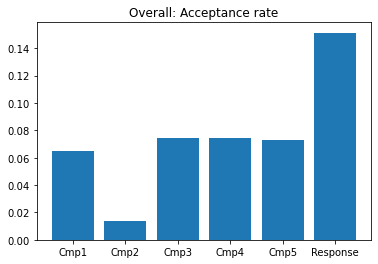

   Campaign0  Campaign1  Campaign2  Campaign3
0        404        933       2024       2443
1        910        239        468       3480
2       1639       1548       3046       6607
3       1215        897       1861       4994
4       2499        790       1418       7058


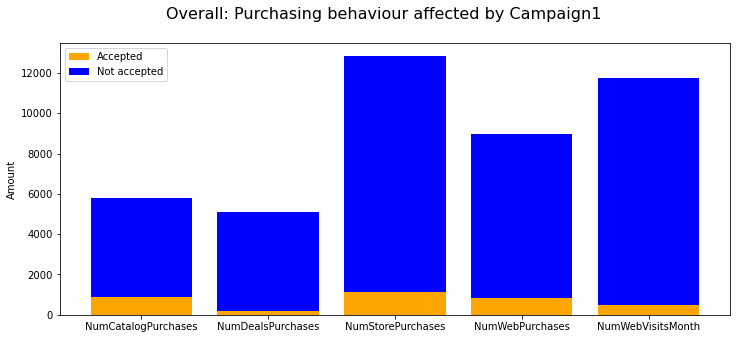

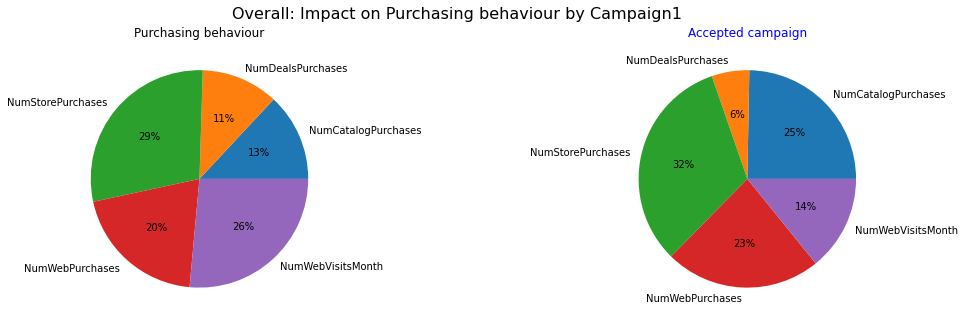

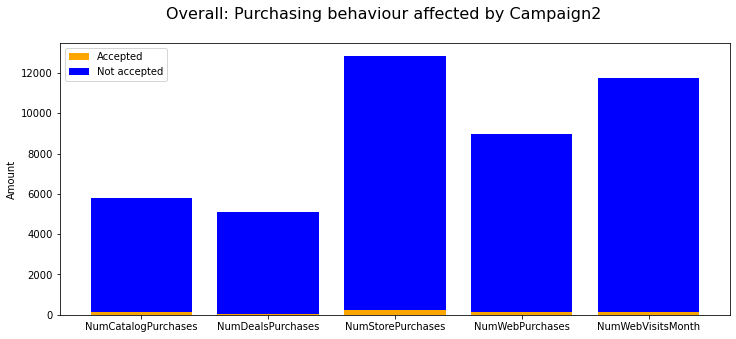

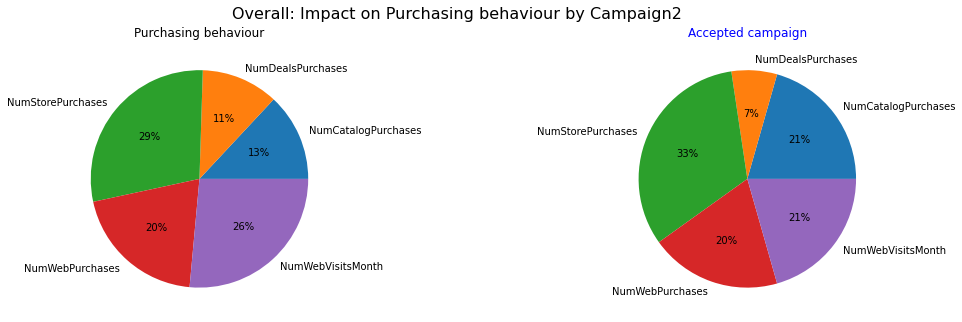

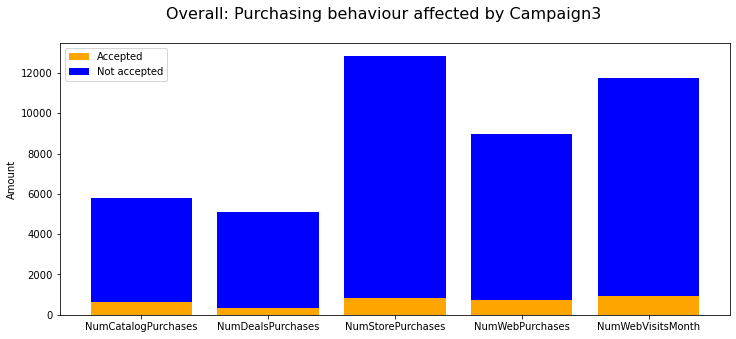

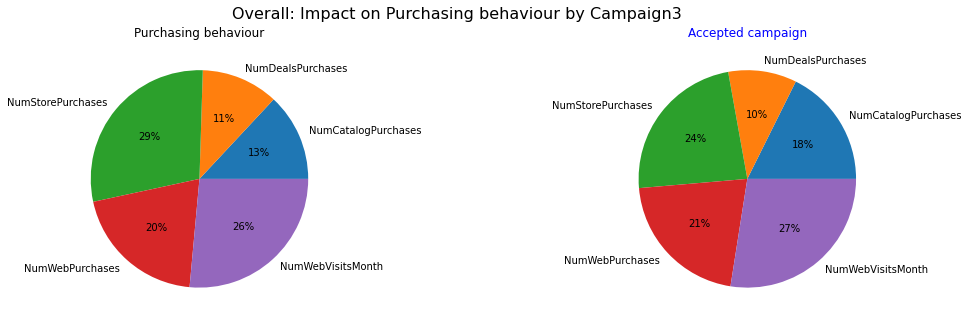

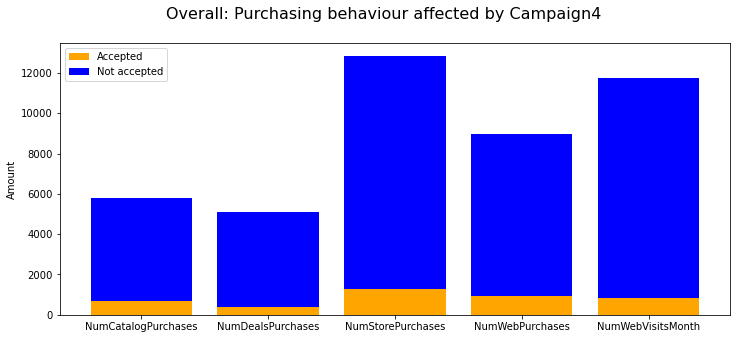

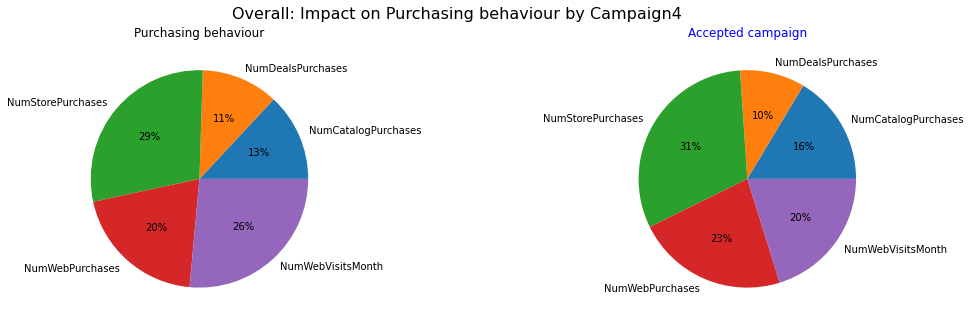

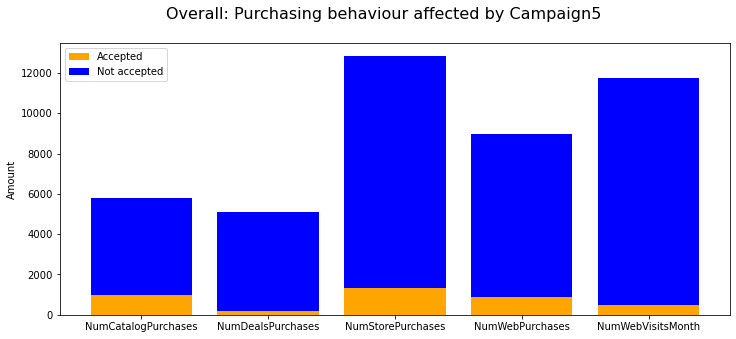

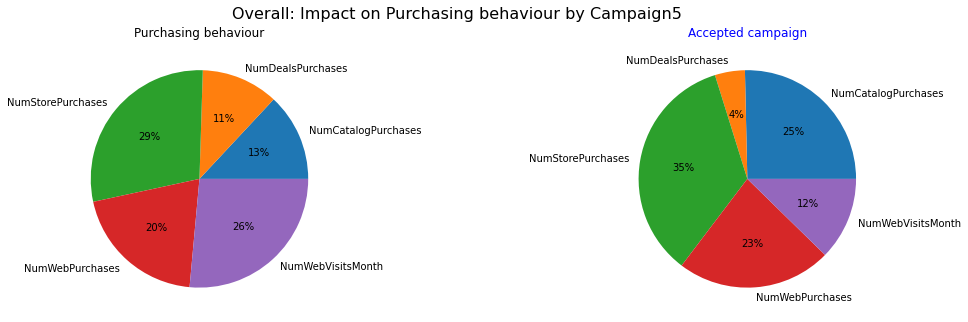

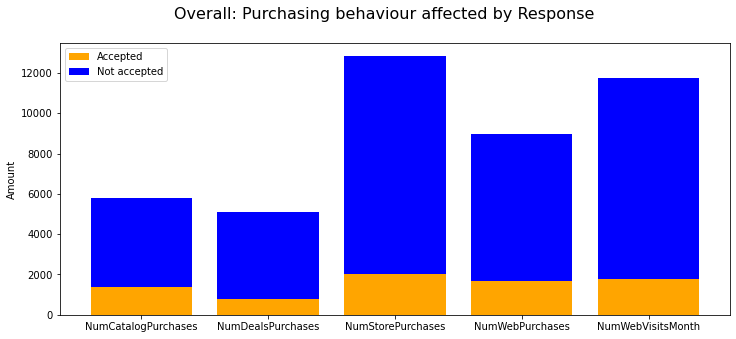

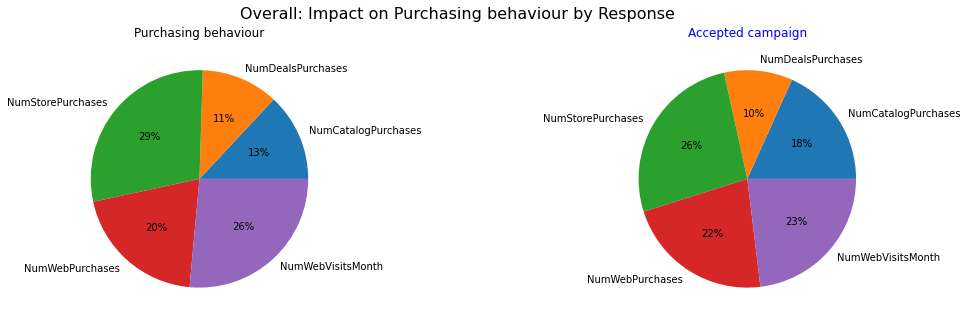

In [39]:
campaign_impact_behaviour(Data_cleaned, "Overall")

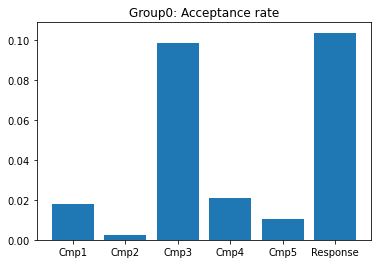

   Campaign0  Campaign1  Campaign2  Campaign3
0        404        933       2024       2443
1        910        239        468       3480
2       1639       1548       3046       6607
3       1215        897       1861       4994
4       2499        790       1418       7058


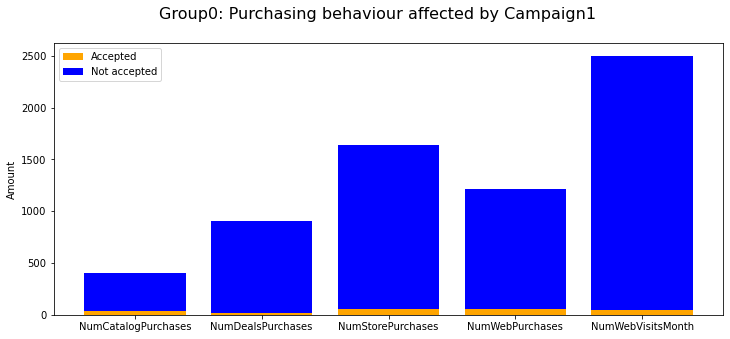

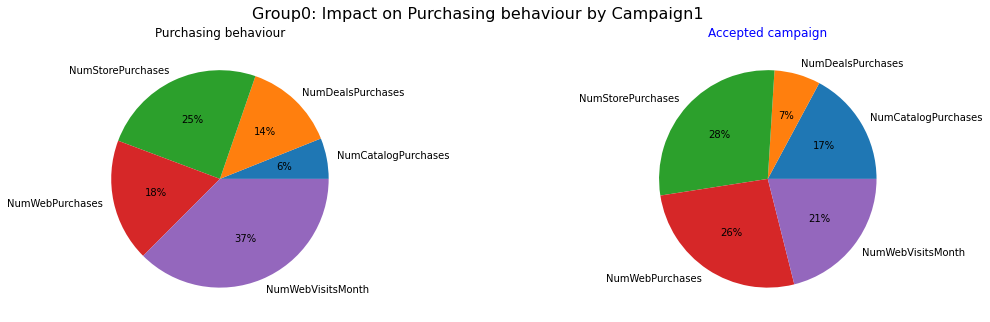

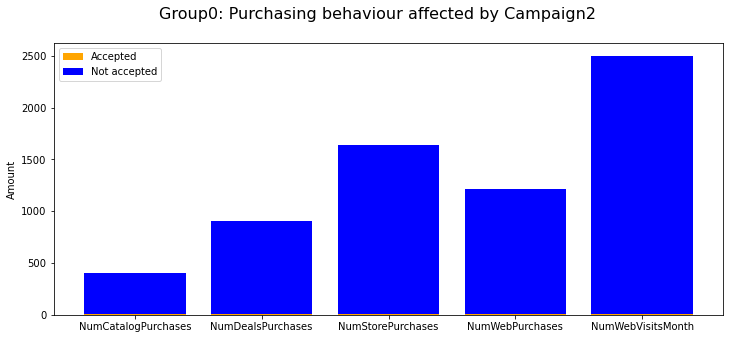

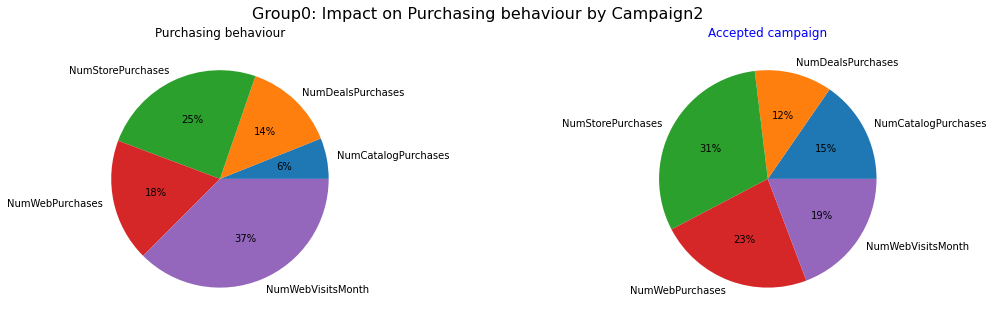

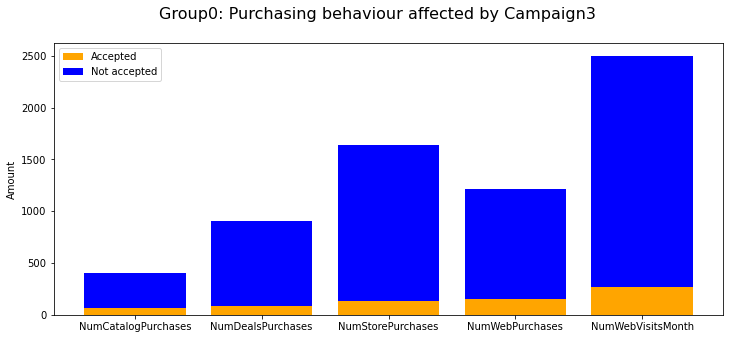

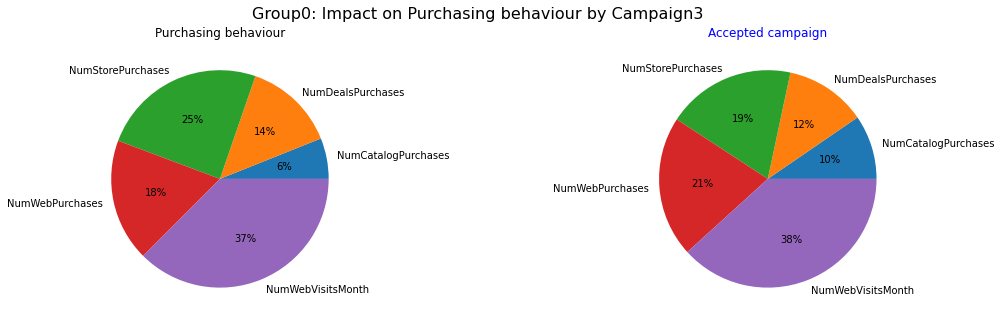

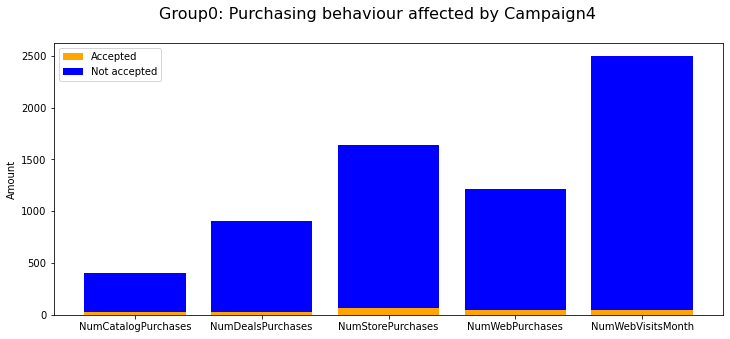

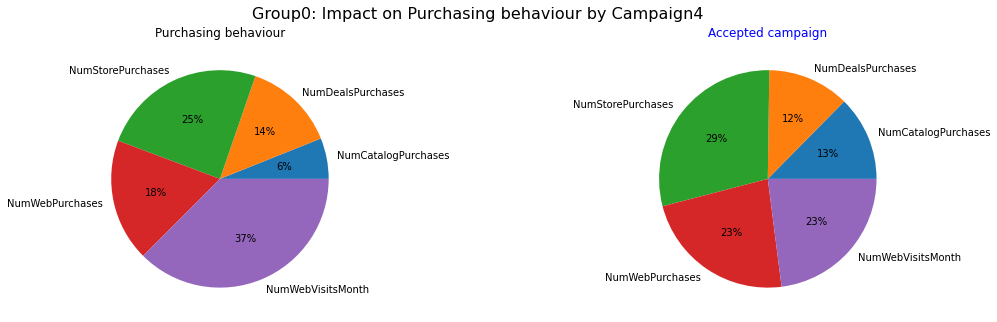

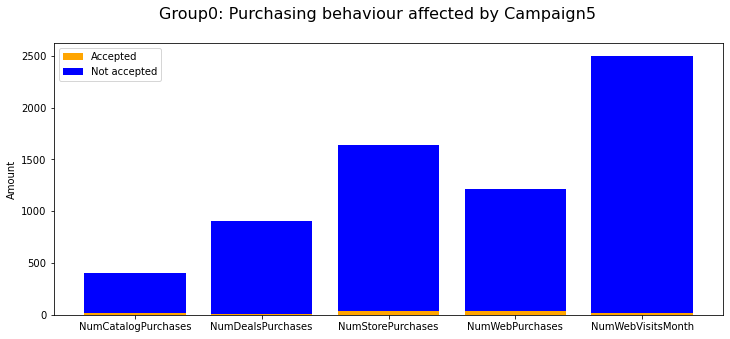

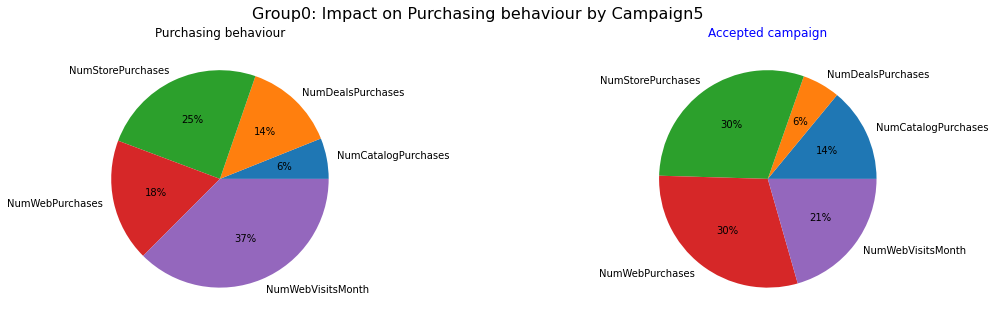

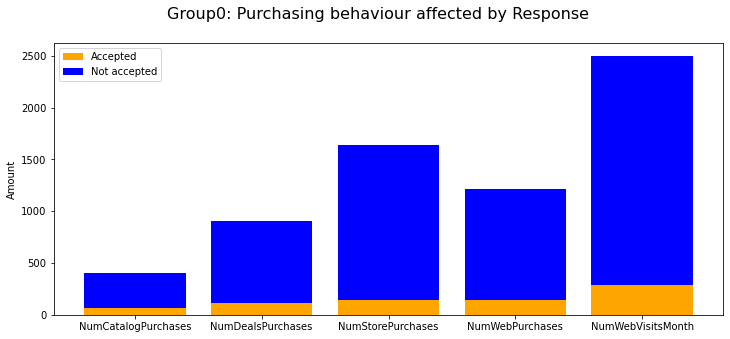

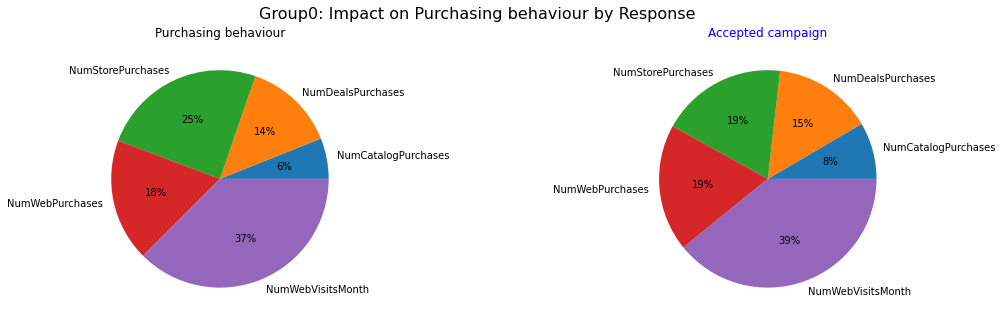

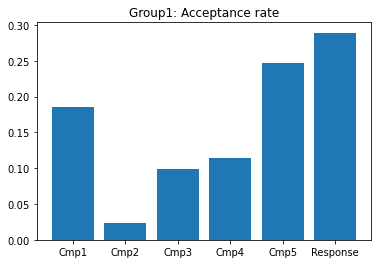

   Campaign0  Campaign1  Campaign2  Campaign3
0        404        933       2024       2443
1        910        239        468       3480
2       1639       1548       3046       6607
3       1215        897       1861       4994
4       2499        790       1418       7058


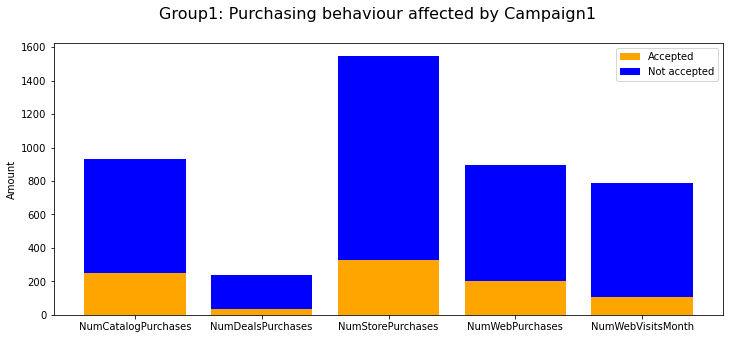

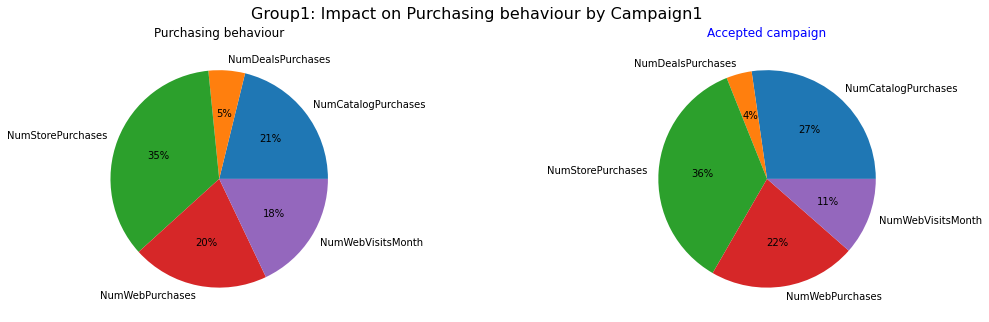

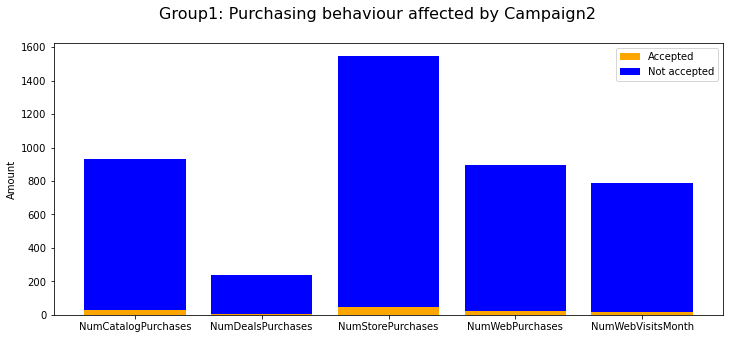

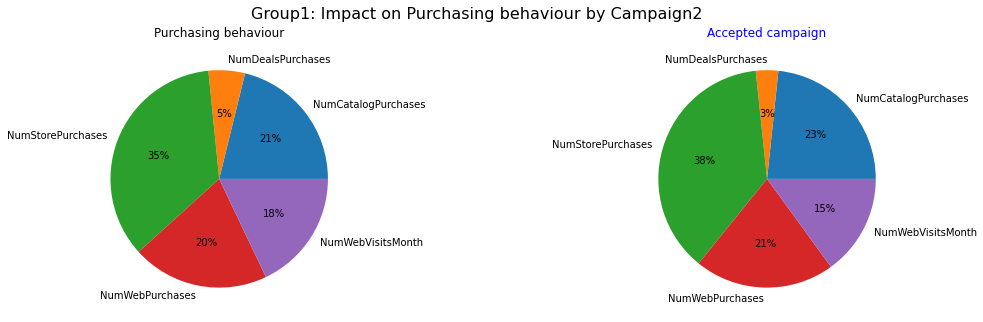

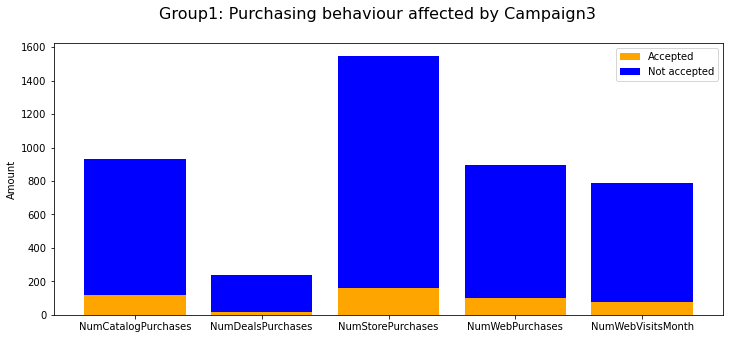

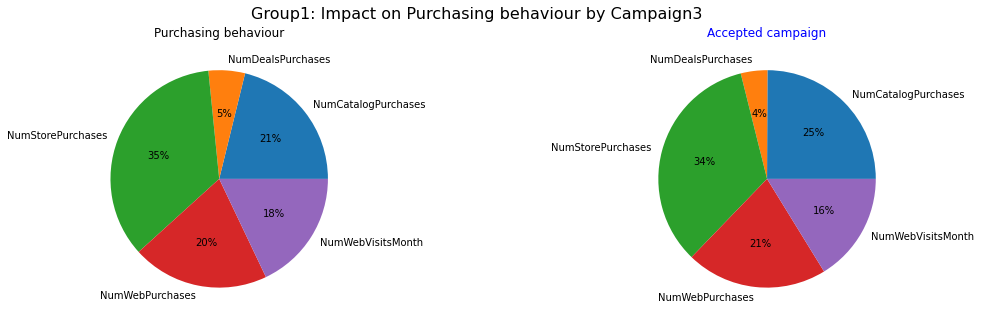

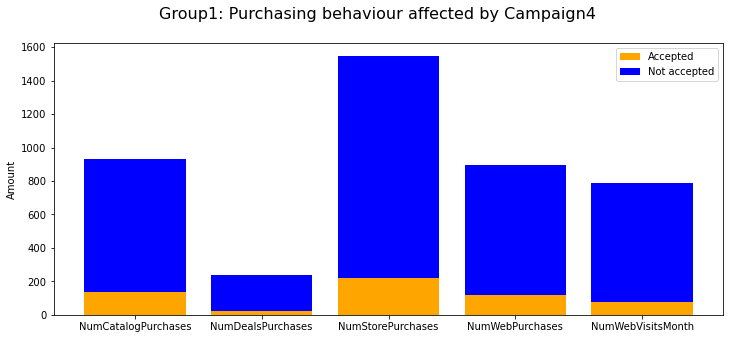

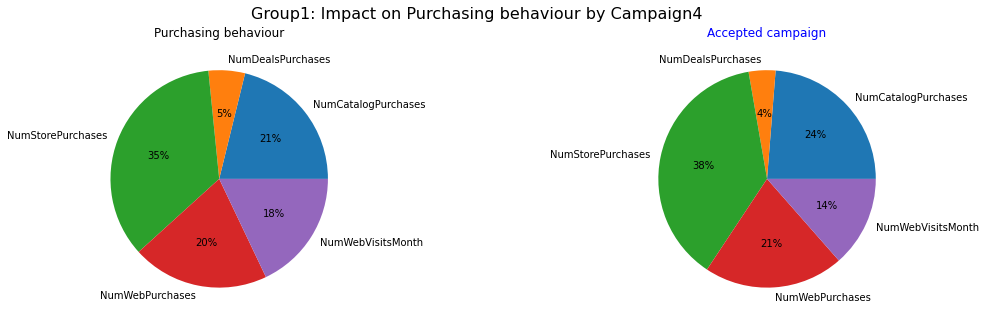

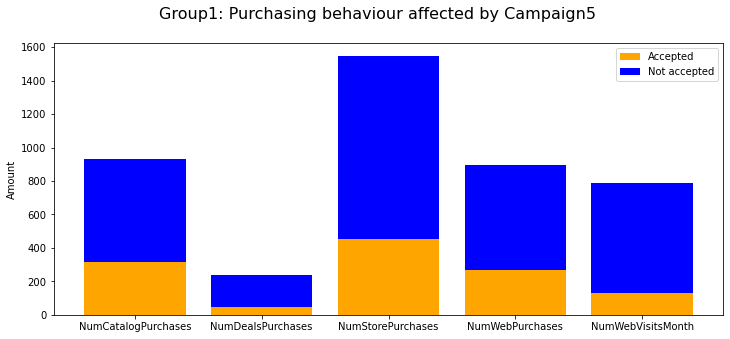

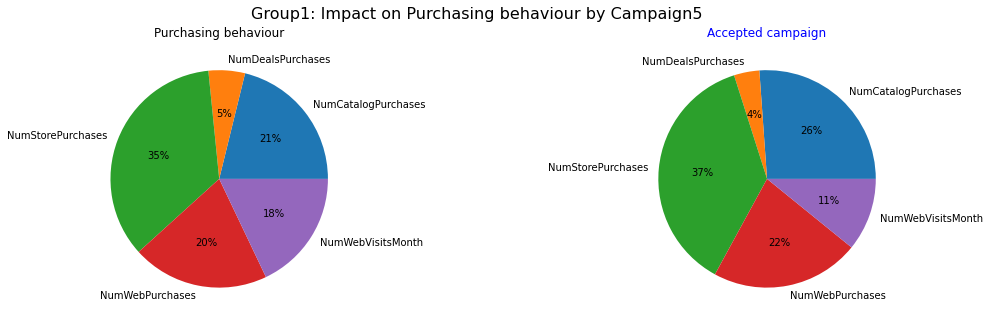

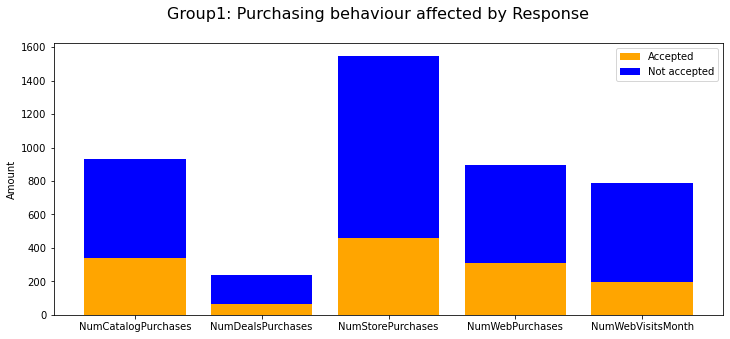

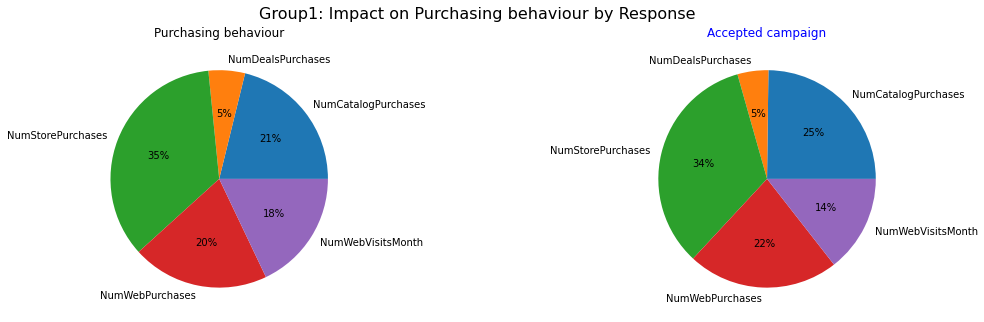

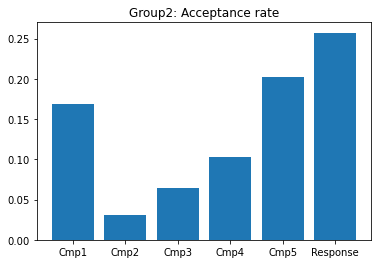

   Campaign0  Campaign1  Campaign2  Campaign3
0        404        933       2024       2443
1        910        239        468       3480
2       1639       1548       3046       6607
3       1215        897       1861       4994
4       2499        790       1418       7058


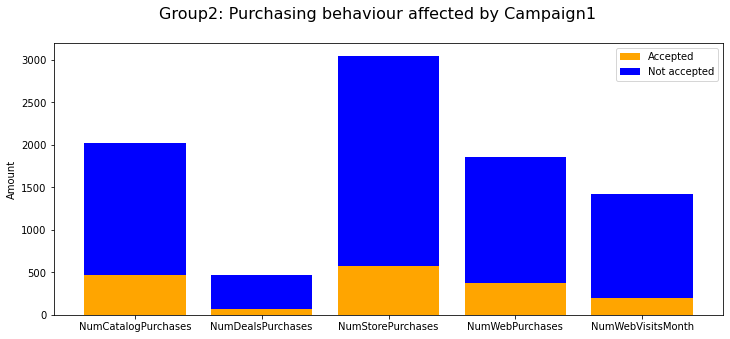

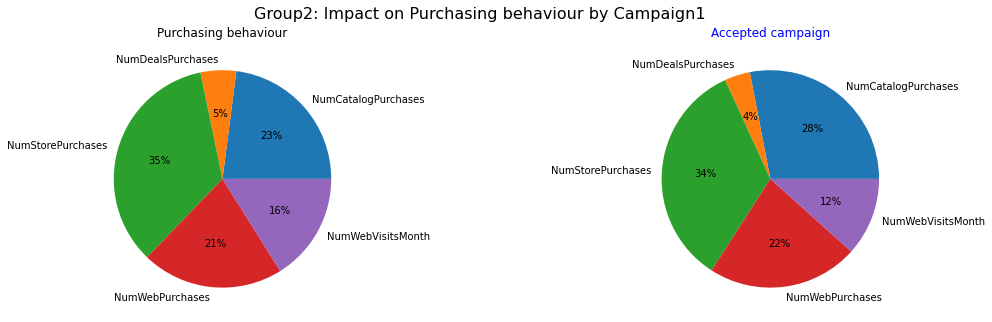

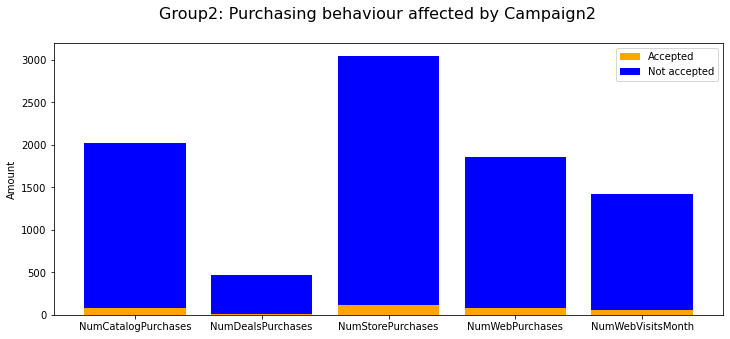

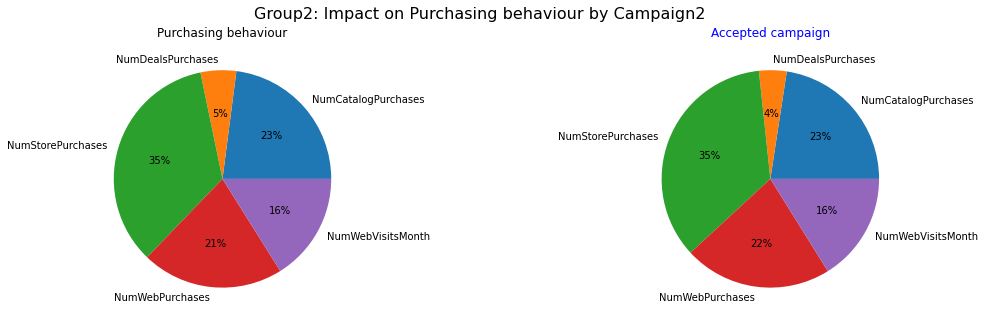

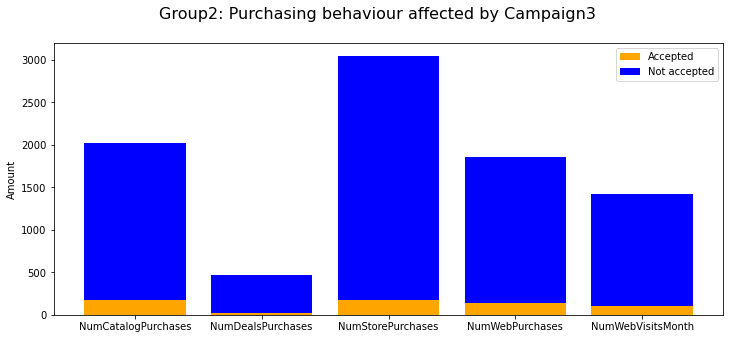

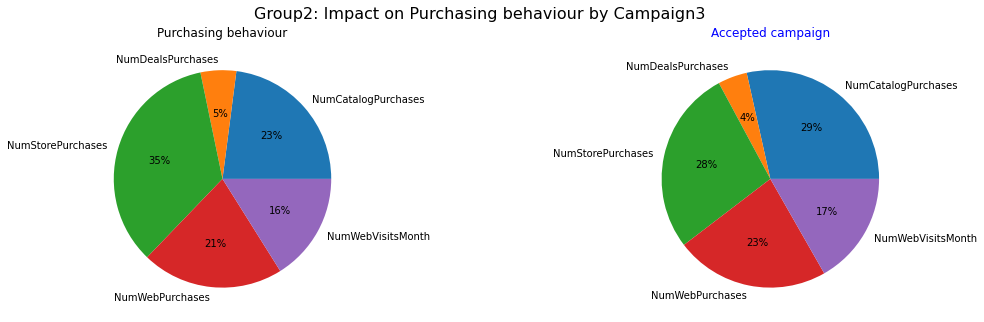

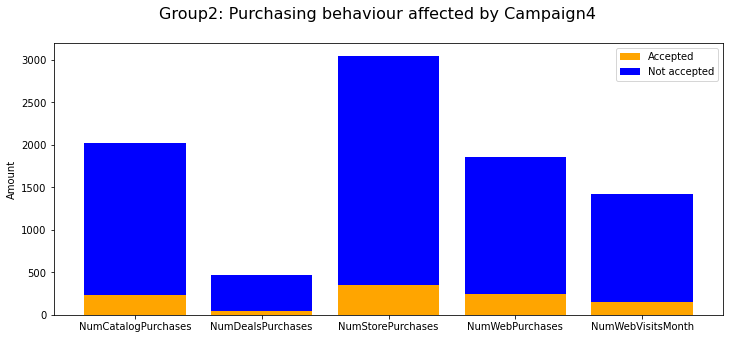

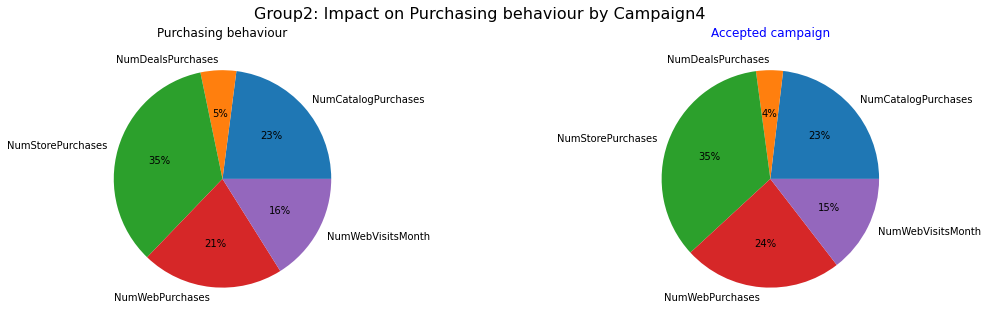

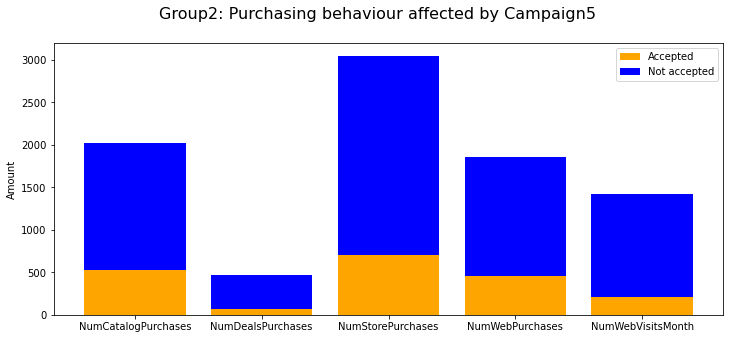

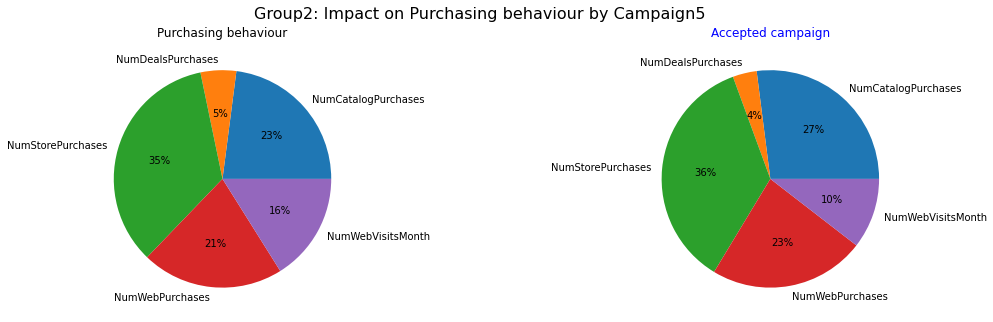

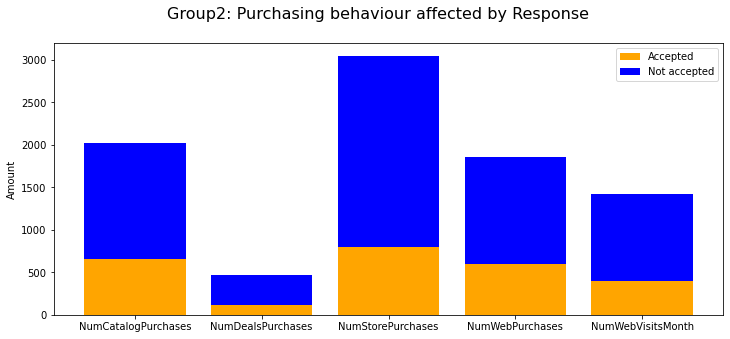

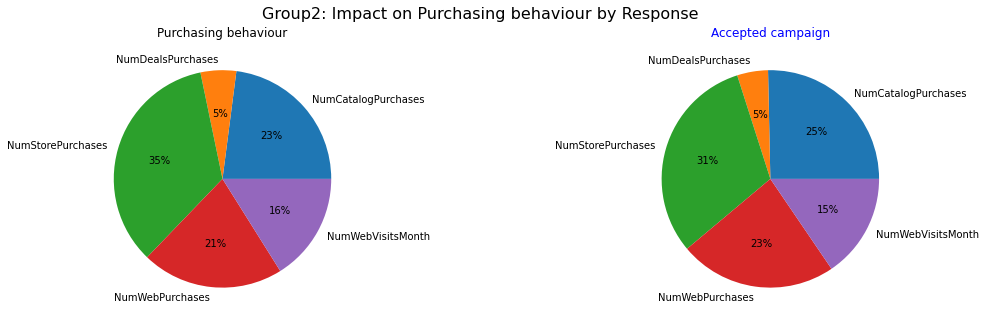

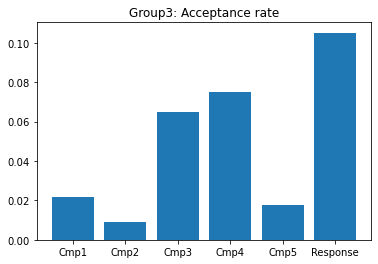

   Campaign0  Campaign1  Campaign2  Campaign3
0        404        933       2024       2443
1        910        239        468       3480
2       1639       1548       3046       6607
3       1215        897       1861       4994
4       2499        790       1418       7058


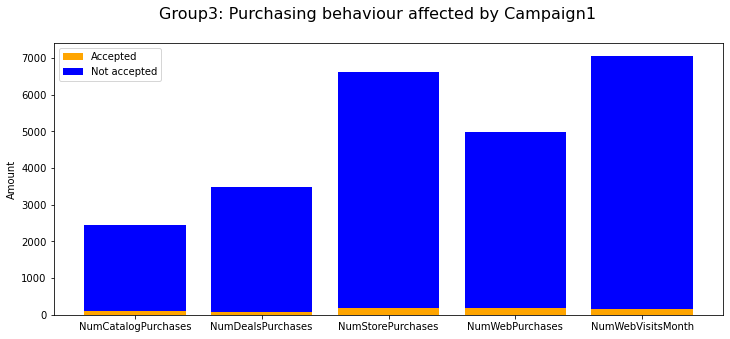

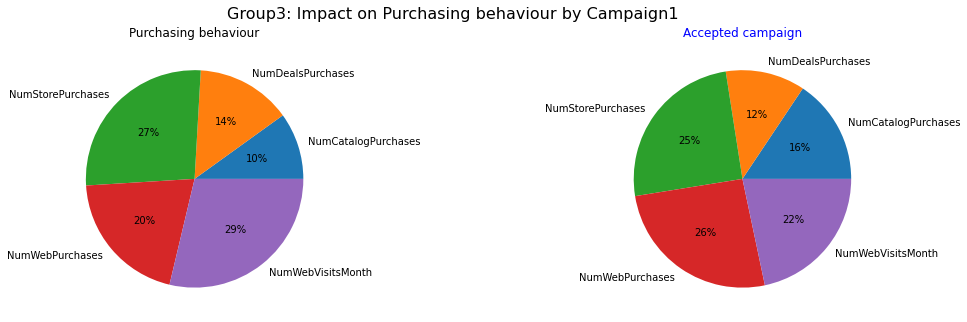

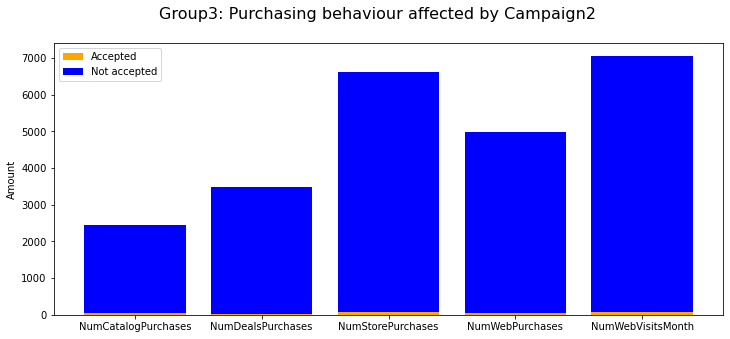

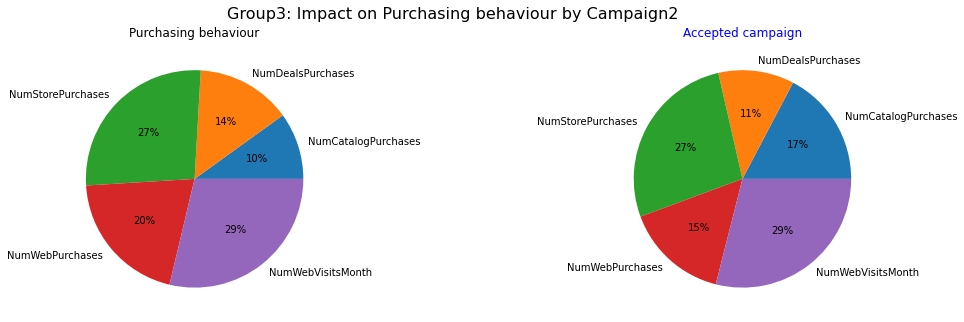

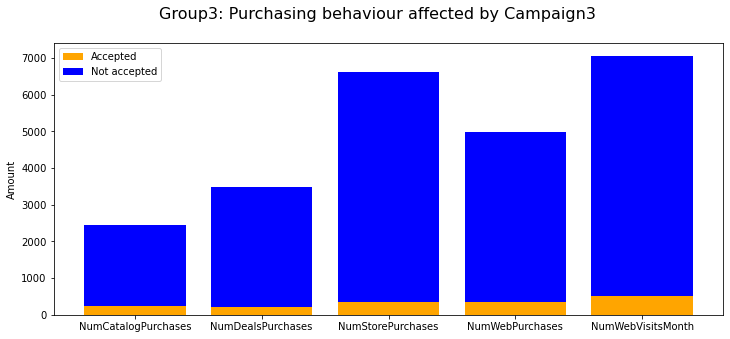

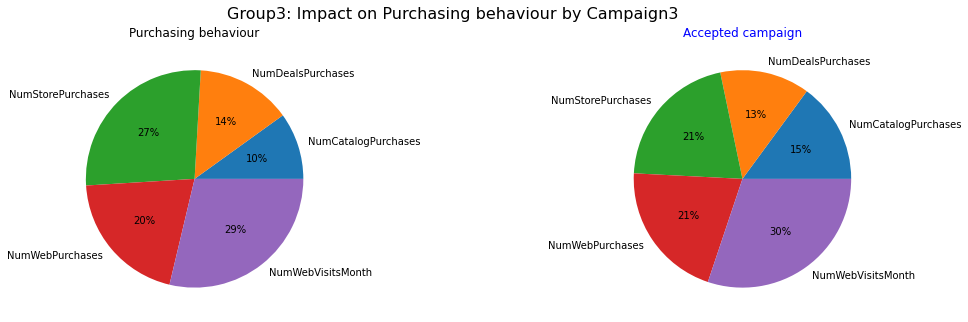

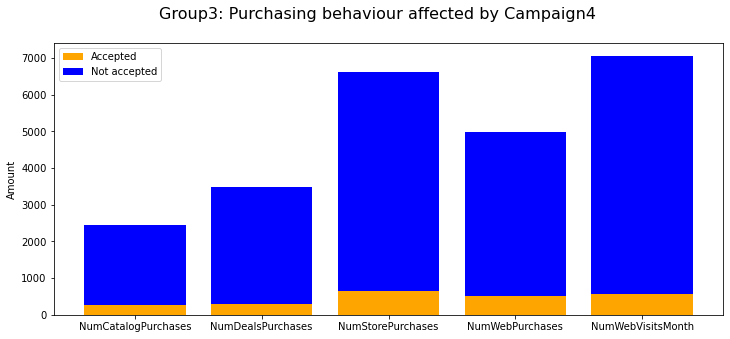

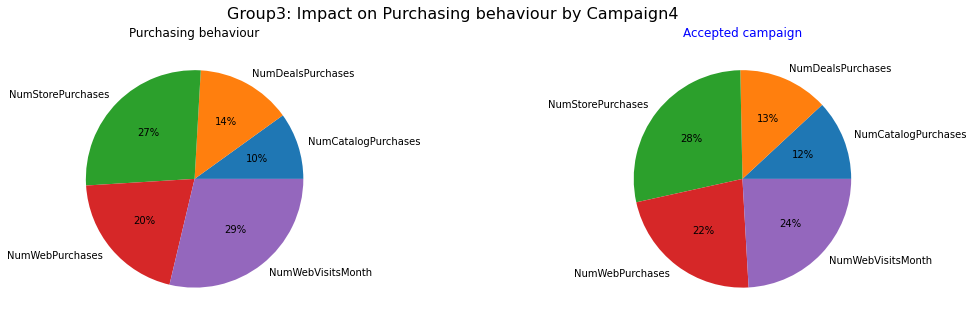

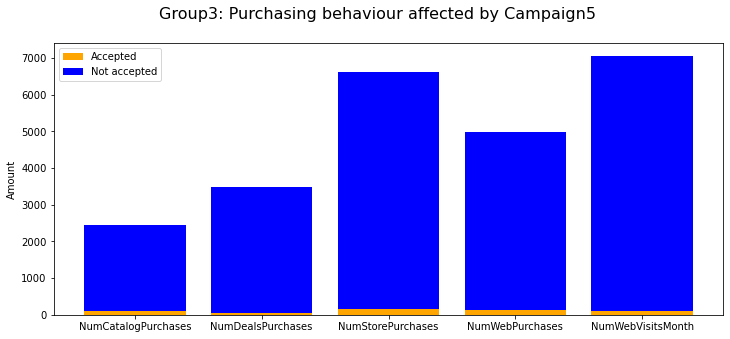

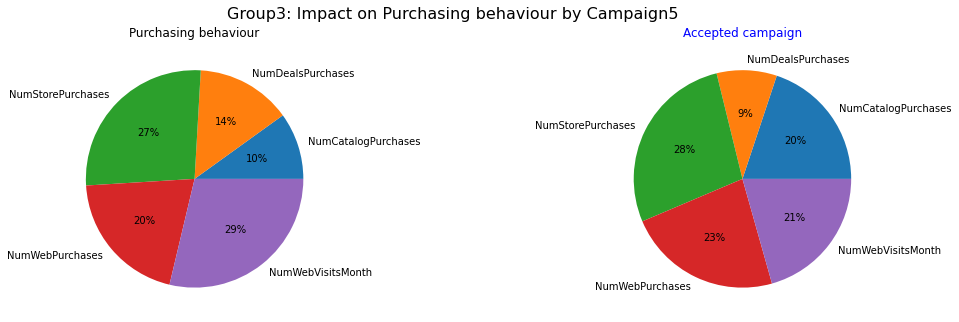

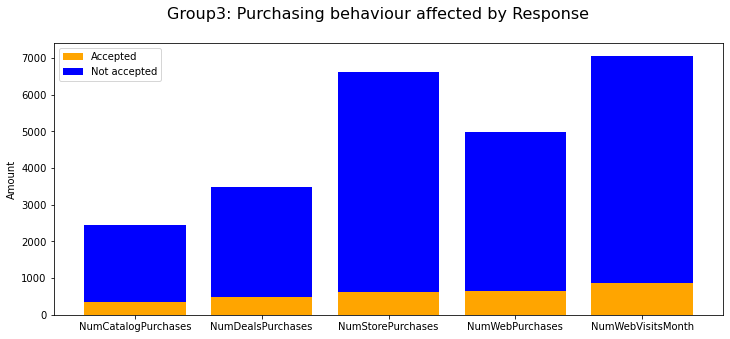

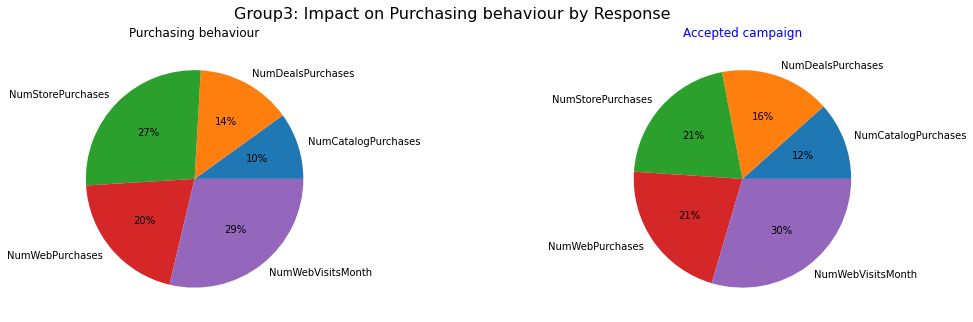

In [40]:
for i in range(n):
    campaign_impact_behaviour(Group[i], "Group"+ str(i))

Time to describe performance of marketing campaigns.

**Cmp1** - promoted all product categories proportionally to total amount of each category. Increased number of products sold via *Store*, *Web* and *Catalog*.

**Cmp2** - only promoted some *Wines*. Overall bad campaign because impacted small amount of people.

**Cmp3** - mostly promoted *Wines* and *Gold* products.

**Cmp4** - promoted *Wines* and *Meat* products

**Cmp5** - promoted all products proportionally. Increased number of products sold via *Store* and *Catalog*.

**Response** - promoted all products proportionally. Increased number of products sold via *Catalog*.

## Conclusions

### Acceptance rate of campaigns

In [41]:
cols = ["Cmp1", "Cmp2","Cmp3","Cmp4","Cmp5","Response"]
groups = ["Group0","Group1","Group2","Group3"]
Acc_rate = pd.DataFrame([campaign_acceptance(Data_cleaned)], columns = cols, index = ["Overall"])
for i in range(n):
    temp = pd.DataFrame([campaign_acceptance(Group[i])], columns = cols, index = [groups[i]])
    Acc_rate = Acc_rate.append(temp)

Acc_rate.style.background_gradient(cmap="Greens",vmin = 0, vmax = Acc_rate.values.max())

### Campaign affected amount spent on products

In [42]:
cols = ["Cmp1", "Cmp2","Cmp3","Cmp4","Cmp5","Response"]
groups = ["Group0","Group1","Group2","Group3"]
Mnt_rate = pd.DataFrame([campaign_mnt_rate(Data_cleaned)], columns = cols, index = ["Overall"])
for i in range(n):
    temp = pd.DataFrame([campaign_mnt_rate(Group[i])], columns = cols, index = [groups[i]])
    Mnt_rate = Mnt_rate.append(temp)

Mnt_rate.style.background_gradient(cmap="Greens", vmin = 0, vmax = Mnt_rate.values.max())

**Cmp1** - performed good in high income groups. Promoted all products.

**Cmp2** - performed bad. Very small amount of people were targeted.

**Cmp3** - was OK with young people. Promoted *Gold* and *Wines*.

**Cmp4** - performed OK in all groups, except Group0. Promoted *Meat* and *Wines*.

**Cmp5** - performed good in high income group. Promoted all products.

**Response** - performed good in high income groups, OK in middle income groups. Promoted all products.

We can see that marketing campaigns mostly performing good in high income groups, on middle income groups every campaign have relatively low impact. To improve performance we might target our next campaigns on families with children and promote purchases via *Deals* as they more preferable in this groups. We saw that middle income groups mostly used to buy *Wines* and *Meat* products, Cmp4 should have been targeted on theese groups. The *Response* campaign had the largest amount of people impacted and was the most effective in the high income groups. 

***Possible next campaigns***:
>I. Focused on *Wines* and *Meat* products. Targeted on people who have children (middle income). Promotes purchases via deals.

>II. Promotion of all products. Targeted on people with no children (high income). Promotes purchases via catalog.